In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_hdf('data1.h5','df_sub')

In [3]:
def remove_duplicated(df):
    return_df = df.copy()
    is_duplicated = return_df.duplicated('moteid')
    return_df = return_df[~is_duplicated]
    return return_df
# remove_duplicated(df_epoch)

In [4]:
epoch_id_list = sorted(pd.unique(df['epoch']))

In [5]:
df_list = []
epoch_id_list_new = sorted(epoch_id_list)
for epoch in epoch_id_list_new:
    sub_df = df[df['epoch'] == epoch]
    sub_df = remove_duplicated(sub_df)
    df_list.append(sub_df)

In [6]:
locs=[[15, 16],
 [11, 12, 13, 14],
 [8, 9, 10],
 [52, 53, 54],
 [49, 50, 51],
 [17, 18],
 [],
 [5, 6, 7],
 [],
 [48],
 [19, 20, 21],
 [],
 [3, 4],
 [],
 [45, 46, 47],
 [22, 23],
 [],
 [1, 2],
 [],
 [43, 44],
 [24, 25, 26],
 [27, 28, 29, 30, 31],
 [32, 33, 34, 35],
 [36, 37, 38, 39, 40],
 [41, 42]]

In [7]:
locs_dict = {}
for i,loc in enumerate(locs):
    if loc != []:
        for id in loc:
            locs_dict[id] = i

In [8]:
def detect_dataframe(df,locs_dict=locs_dict):
    locs_zeros = np.zeros(25)
    df_ids = df['moteid'].values
    for id in df_ids:
#         print(id)
        if id in locs_dict.keys():
            locs_zeros[locs_dict[id]] = 1
        
#     return len(np.where(locs_zeros != 0)[0])
    return locs_zeros
detect_dataframe(df_list[10000])

array([1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1.])

In [9]:
def compute_temporal_length(df_zeros,window=3):
    summ = 0
    index = np.where(df_zeros == 1)[0]
    length = len(df_zeros)
    for item_index in index:
        if item_index+window <= length:
            if 0 not in df_zeros[item_index:item_index+window]:
                summ += 1
    return summ
# compute_temporal_length(df_zeros,5)

In [10]:
# get frame list
def compute_temporal_length1(df_zeros,window=3):
    summ = 0
    frame_list = np.zeros(65536)
    index = np.where(df_zeros == 1)[0]
    length = len(df_zeros)
    for item_index in index:
        if item_index+window <= length:
            if 0 not in df_zeros[item_index:item_index+window]:
                summ += 1
                frame_list[item_index] = 1
    return summ,frame_list

40555.0
1 40555
2 28997
3 22143
4 17648
5 14490
6 12159
7 10410
8 9046
9 7953


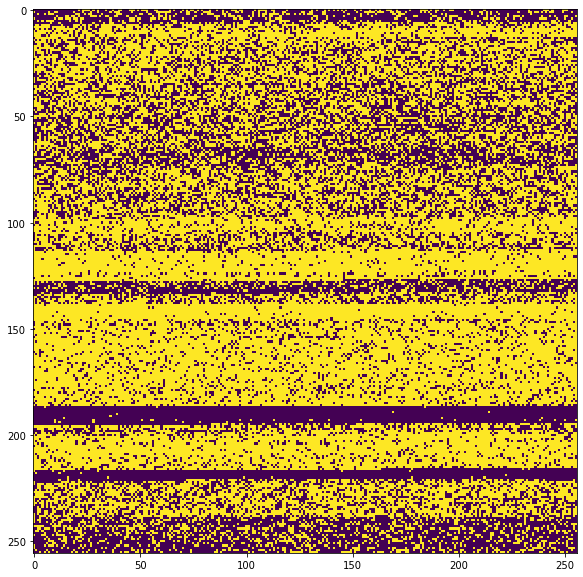

In [12]:
# after drop 3, 4, 24,9,19
# zeross = np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
#        1., 0., 1., 1., 1., 1., 1., 0.]) #11
zeross = np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 1., 1., 0.]) #10

df_zeros = np.zeros(65536)
for i,ddf in enumerate(df_list):
#     print(i)
    if -1 not in (detect_dataframe(ddf)-zeross):
        df_zeros[i] = 1.
print(np.sum(df_zeros))
for i in np.arange(1,10,1):
    print(i,compute_temporal_length(df_zeros,i))
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(df_zeros.reshape(256,256))

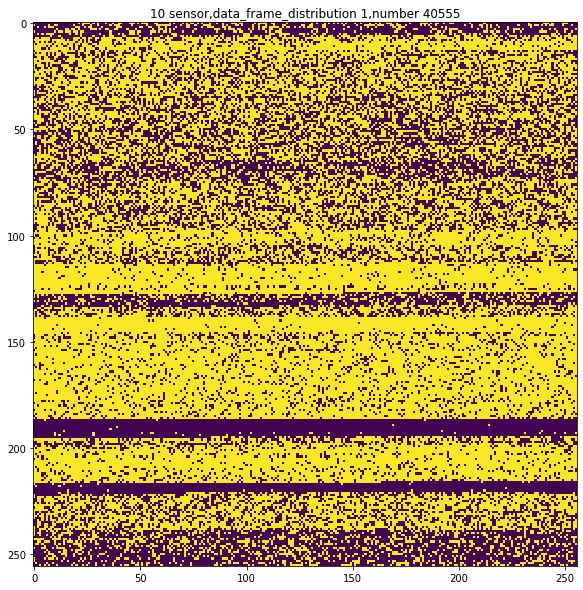

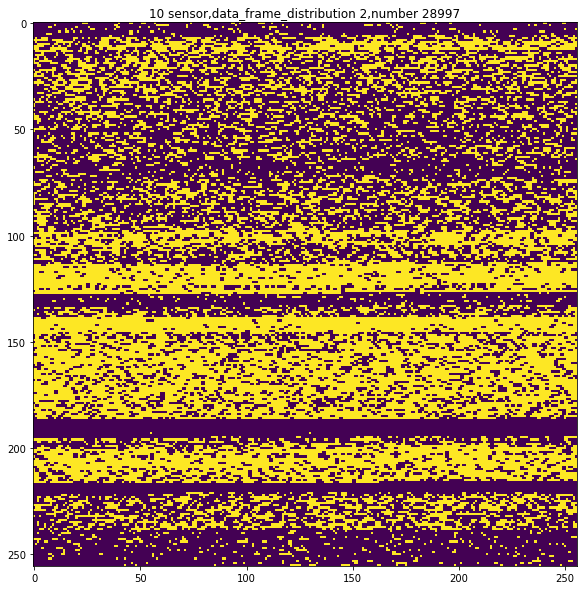

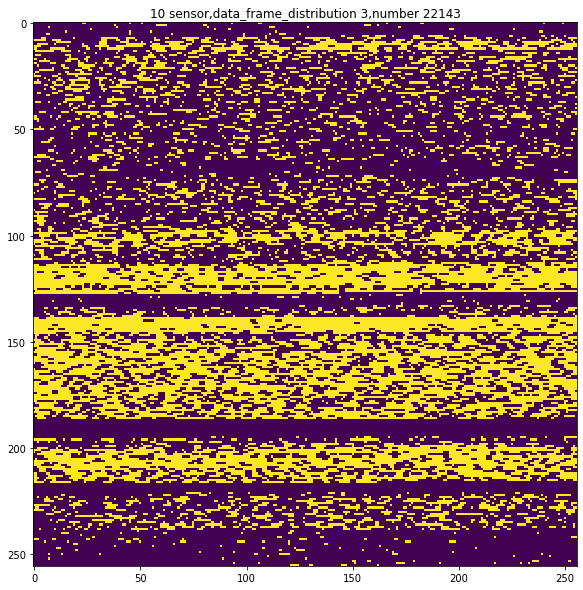

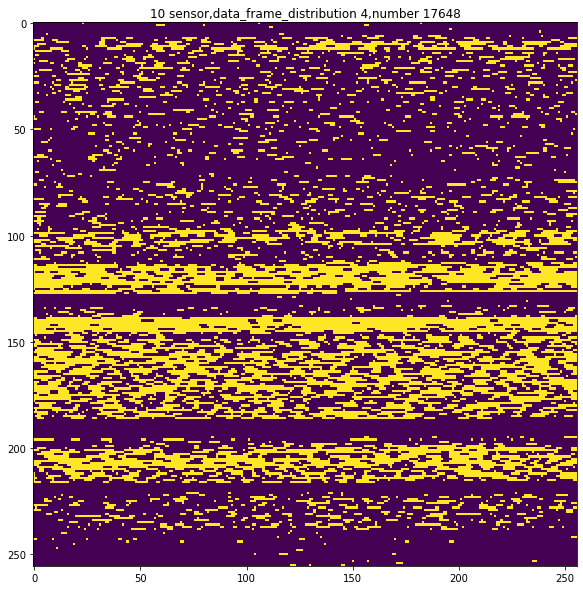

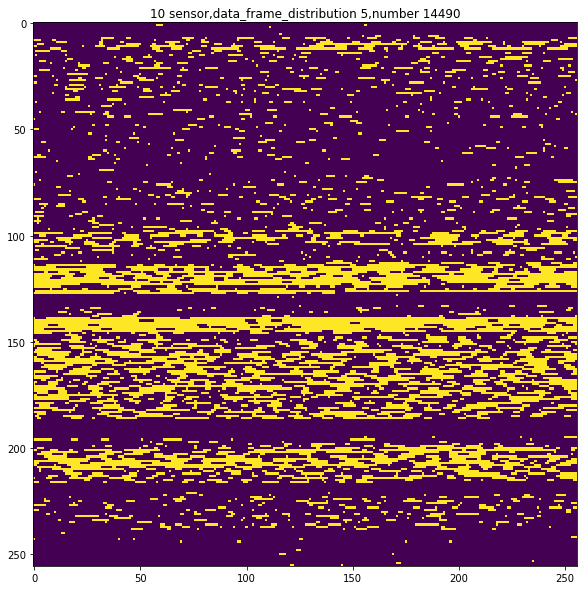

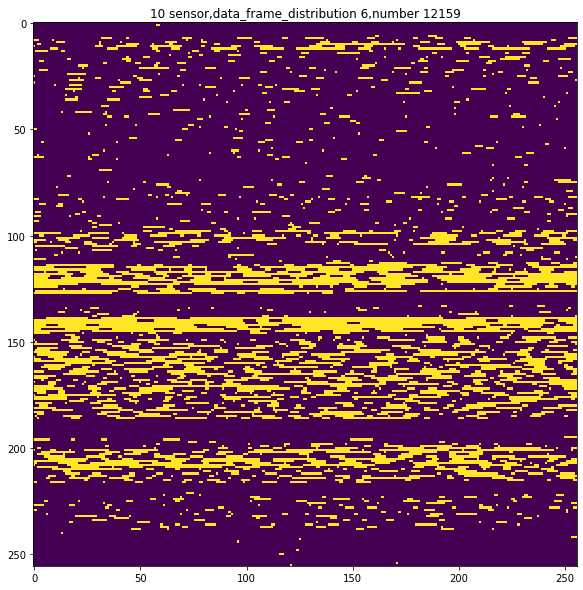

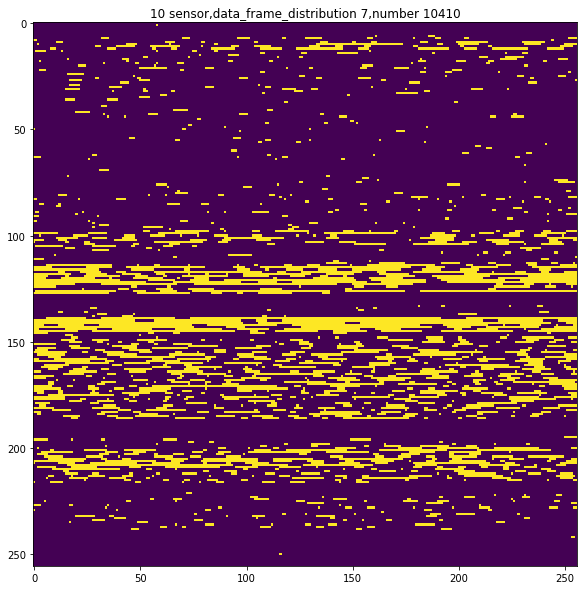

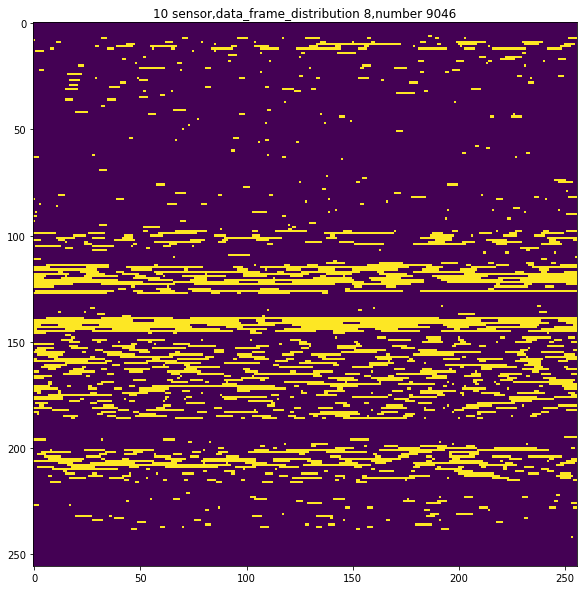

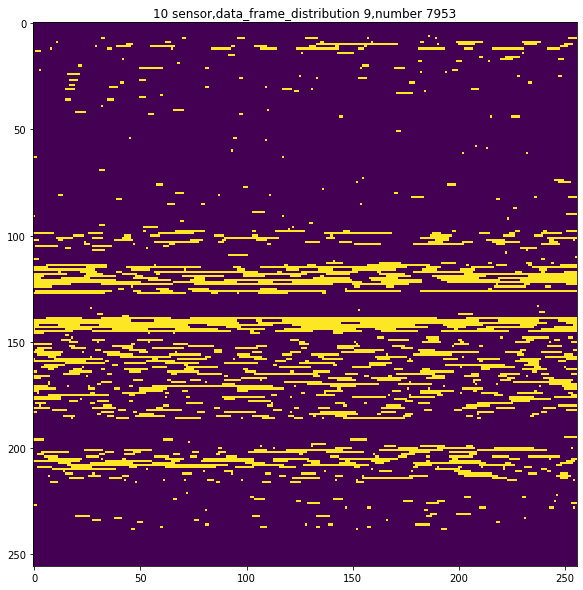

In [13]:
# show frame_list distribution
plt.rcParams["figure.figsize"] = (10,10)
for length in np.arange(1,10,1):
    fl = compute_temporal_length1(df_zeros,length)
    plt.figure()
    plt.imshow(fl[1].reshape(256,256))
    plt.title('{} sensor,data_frame_distribution {},number {}'.format(int(np.sum(zeross)),length,fl[0]))
#     plt.savefig('{}_data_frame_distribution_{}.png'.format(int(np.sum(zeross)),length),dpi=300)

In [14]:
length = 4
fl = compute_temporal_length1(df_zeros,length)
print(fl[0])

17648


In [15]:
frame_list = fl[1]
print(frame_list)

[0. 0. 0. ... 0. 0. 0.]


In [16]:
frame_index = np.where(frame_list==1)[0]

In [17]:
zeross.reshape(5,5)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 0.]])

In [18]:
df_list[frame_index[0]]

,datetime,epoch,moteid,temperature,humidity,light,voltage
6,2004-02-28 01:09:22.323858,23,1,19.1652,38.87200,45.08000,2.68742
89981,2004-02-28 01:09:16.173850,23,3,19.3514,38.97420,48.76000,2.68742
216098,2004-02-28 01:09:16.530298,23,7,19.4004,39.34830,104.88000,2.68742
288234,2004-02-28 01:09:16.802535,23,9,18.9986,41.24250,104.88000,2.76242
338126,2004-02-28 01:09:16.259468,23,10,18.9496,41.37710,75.44000,2.67532
481708,2004-02-28 01:09:16.065721,23,14,17.8422,41.67970,28.52000,2.71196
513527,2004-02-29 21:42:27.148293,23,15,19.1750,42.75190,1.84000,2.41431
515861,2004-02-28 01:09:16.641526,23,16,17.0092,44.31620,18.40000,2.62796
550509,2004-02-29 13:32:50.406573,23,17,21.6348,38.53110,625.60000,2.58226
584234,2004-02-28 01:09:16.955970,23,18,18.8908,38.83790,57.04000,2.50599


In [19]:
loc_index = np.where(zeross != 0)[0]
for loc_id in loc_index:
    print(locs[loc_id])

[8, 9, 10]
[19, 20, 21]
[3, 4]
[45, 46, 47]
[22, 23]
[1, 2]
[24, 25, 26]
[27, 28, 29, 30, 31]
[32, 33, 34, 35]
[36, 37, 38, 39, 40]


In [20]:
len(frame_index)

17648

In [21]:
def aggreate(df,zeross,locs):
    return_data = np.zeros(int(np.sum(zeross)))
    loc_index = np.where(zeross != 0)[0]
    for i,loc_id in enumerate(loc_index):
#         print(locs[loc_id])
        mean = 0
        num = 0
        for id in locs[loc_id]:
            v = df[df['moteid'] == int(id)]['temperature'].values
            if len(v) != 0:
#                 if v[0] > 120:
#                     break
#                 print(v[0])
                mean += v[0]
                num += 1
        if num != 0:
            return_data[i] = mean / num
        else:
            return_data[i] = np.nan
    return return_data
aggreate(df_list[frame_index[10000]],zeross,locs)

array([ 20.743     ,  72.0556    ,  21.5809    ,  21.5172    ,
        72.2712    , 122.153     ,  88.72206667, 122.153     ,
        88.70573333,  21.5368    ])

In [22]:
data_list = []
# length = 5
for index in frame_index:
    data = []
    for i in range(length):
        print(index,i)
        data.append(aggreate(df_list[index+i],zeross,locs))
    data_list.append(data)

23 0
23 1
23 2
23 3
106 0
106 1
106 2
106 3
182 0
182 1
182 2
182 3
314 0
314 1
314 2
314 3
315 0
315 1
315 2
315 3
316 0
316 1
316 2
316 3
317 0
317 1
317 2
317 3
336 0
336 1
336 2
336 3
412 0
412 1
412 2
412 3
413 0
413 1
413 2
413 3
623 0
623 1
623 2
623 3
624 0
624 1
624 2
624 3
964 0
964 1
964 2
964 3
1262 0
1262 1
1262 2
1262 3
1286 0
1286 1
1286 2
1286 3
1396 0
1396 1
1396 2
1396 3
1397 0
1397 1
1397 2
1397 3
1681 0
1681 1
1681 2
1681 3
1691 0
1691 1
1691 2
1691 3
1692 0
1692 1
1692 2
1692 3
1697 0
1697 1
1697 2
1697 3
1698 0
1698 1
1698 2
1698 3
1699 0
1699 1
1699 2
1699 3
1700 0
1700 1
1700 2
1700 3
1715 0
1715 1
1715 2
1715 3
1716 0
1716 1
1716 2
1716 3
1722 0
1722 1
1722 2
1722 3
1723 0
1723 1
1723 2
1723 3
1724 0
1724 1
1724 2
1724 3
1725 0
1725 1
1725 2
1725 3
1726 0
1726 1
1726 2
1726 3
1727 0
1727 1
1727 2
1727 3
1760 0
1760 1
1760 2
1760 3
1775 0
1775 1
1775 2
1775 3
1796 0
1796 1
1796 2
1796 3
1824 0
1824 1
1824 2
1824 3
1825 0
1825 1
1825 2
1825 3
1826 0
1826 1
1826 2

2703 1
2703 2
2703 3
2704 0
2704 1
2704 2
2704 3
2705 0
2705 1
2705 2
2705 3
2706 0
2706 1
2706 2
2706 3
2707 0
2707 1
2707 2
2707 3
2708 0
2708 1
2708 2
2708 3
2709 0
2709 1
2709 2
2709 3
2710 0
2710 1
2710 2
2710 3
2711 0
2711 1
2711 2
2711 3
2712 0
2712 1
2712 2
2712 3
2713 0
2713 1
2713 2
2713 3
2714 0
2714 1
2714 2
2714 3
2715 0
2715 1
2715 2
2715 3
2716 0
2716 1
2716 2
2716 3
2717 0
2717 1
2717 2
2717 3
2718 0
2718 1
2718 2
2718 3
2719 0
2719 1
2719 2
2719 3
2720 0
2720 1
2720 2
2720 3
2721 0
2721 1
2721 2
2721 3
2722 0
2722 1
2722 2
2722 3
2723 0
2723 1
2723 2
2723 3
2724 0
2724 1
2724 2
2724 3
2725 0
2725 1
2725 2
2725 3
2726 0
2726 1
2726 2
2726 3
2727 0
2727 1
2727 2
2727 3
2728 0
2728 1
2728 2
2728 3
2729 0
2729 1
2729 2
2729 3
2730 0
2730 1
2730 2
2730 3
2731 0
2731 1
2731 2
2731 3
2732 0
2732 1
2732 2
2732 3
2733 0
2733 1
2733 2
2733 3
2734 0
2734 1
2734 2
2734 3
2735 0
2735 1
2735 2
2735 3
2736 0
2736 1
2736 2
2736 3
2741 0
2741 1
2741 2
2741 3
2742 0
2742 1
2742 2
2742 3

3265 1
3265 2
3265 3
3266 0
3266 1
3266 2
3266 3
3267 0
3267 1
3267 2
3267 3
3268 0
3268 1
3268 2
3268 3
3269 0
3269 1
3269 2
3269 3
3270 0
3270 1
3270 2
3270 3
3275 0
3275 1
3275 2
3275 3
3276 0
3276 1
3276 2
3276 3
3277 0
3277 1
3277 2
3277 3
3278 0
3278 1
3278 2
3278 3
3279 0
3279 1
3279 2
3279 3
3280 0
3280 1
3280 2
3280 3
3281 0
3281 1
3281 2
3281 3
3282 0
3282 1
3282 2
3282 3
3283 0
3283 1
3283 2
3283 3
3288 0
3288 1
3288 2
3288 3
3289 0
3289 1
3289 2
3289 3
3290 0
3290 1
3290 2
3290 3
3291 0
3291 1
3291 2
3291 3
3292 0
3292 1
3292 2
3292 3
3293 0
3293 1
3293 2
3293 3
3294 0
3294 1
3294 2
3294 3
3295 0
3295 1
3295 2
3295 3
3296 0
3296 1
3296 2
3296 3
3297 0
3297 1
3297 2
3297 3
3298 0
3298 1
3298 2
3298 3
3299 0
3299 1
3299 2
3299 3
3300 0
3300 1
3300 2
3300 3
3301 0
3301 1
3301 2
3301 3
3302 0
3302 1
3302 2
3302 3
3303 0
3303 1
3303 2
3303 3
3304 0
3304 1
3304 2
3304 3
3305 0
3305 1
3305 2
3305 3
3306 0
3306 1
3306 2
3306 3
3307 0
3307 1
3307 2
3307 3
3314 0
3314 1
3314 2
3314 3

4653 1
4653 2
4653 3
4654 0
4654 1
4654 2
4654 3
4655 0
4655 1
4655 2
4655 3
4665 0
4665 1
4665 2
4665 3
4666 0
4666 1
4666 2
4666 3
4680 0
4680 1
4680 2
4680 3
4700 0
4700 1
4700 2
4700 3
4701 0
4701 1
4701 2
4701 3
4702 0
4702 1
4702 2
4702 3
4703 0
4703 1
4703 2
4703 3
4704 0
4704 1
4704 2
4704 3
4711 0
4711 1
4711 2
4711 3
4712 0
4712 1
4712 2
4712 3
4719 0
4719 1
4719 2
4719 3
4720 0
4720 1
4720 2
4720 3
4721 0
4721 1
4721 2
4721 3
4722 0
4722 1
4722 2
4722 3
4723 0
4723 1
4723 2
4723 3
4736 0
4736 1
4736 2
4736 3
4737 0
4737 1
4737 2
4737 3
4746 0
4746 1
4746 2
4746 3
4754 0
4754 1
4754 2
4754 3
4774 0
4774 1
4774 2
4774 3
4789 0
4789 1
4789 2
4789 3
4790 0
4790 1
4790 2
4790 3
4791 0
4791 1
4791 2
4791 3
4792 0
4792 1
4792 2
4792 3
4793 0
4793 1
4793 2
4793 3
4794 0
4794 1
4794 2
4794 3
4795 0
4795 1
4795 2
4795 3
4807 0
4807 1
4807 2
4807 3
4808 0
4808 1
4808 2
4808 3
4809 0
4809 1
4809 2
4809 3
4810 0
4810 1
4810 2
4810 3
4811 0
4811 1
4811 2
4811 3
4812 0
4812 1
4812 2
4812 3

6163 0
6163 1
6163 2
6163 3
6164 0
6164 1
6164 2
6164 3
6165 0
6165 1
6165 2
6165 3
6166 0
6166 1
6166 2
6166 3
6167 0
6167 1
6167 2
6167 3
6168 0
6168 1
6168 2
6168 3
6169 0
6169 1
6169 2
6169 3
6170 0
6170 1
6170 2
6170 3
6178 0
6178 1
6178 2
6178 3
6179 0
6179 1
6179 2
6179 3
6186 0
6186 1
6186 2
6186 3
6194 0
6194 1
6194 2
6194 3
6195 0
6195 1
6195 2
6195 3
6203 0
6203 1
6203 2
6203 3
6204 0
6204 1
6204 2
6204 3
6205 0
6205 1
6205 2
6205 3
6256 0
6256 1
6256 2
6256 3
6261 0
6261 1
6261 2
6261 3
6279 0
6279 1
6279 2
6279 3
6280 0
6280 1
6280 2
6280 3
6285 0
6285 1
6285 2
6285 3
6296 0
6296 1
6296 2
6296 3
6319 0
6319 1
6319 2
6319 3
6320 0
6320 1
6320 2
6320 3
6321 0
6321 1
6321 2
6321 3
6360 0
6360 1
6360 2
6360 3
6361 0
6361 1
6361 2
6361 3
6362 0
6362 1
6362 2
6362 3
6379 0
6379 1
6379 2
6379 3
6380 0
6380 1
6380 2
6380 3
6400 0
6400 1
6400 2
6400 3
6401 0
6401 1
6401 2
6401 3
6402 0
6402 1
6402 2
6402 3
6409 0
6409 1
6409 2
6409 3
6410 0
6410 1
6410 2
6410 3
6447 0
6447 1
6447 2

7931 2
7931 3
7945 0
7945 1
7945 2
7945 3
7951 0
7951 1
7951 2
7951 3
7952 0
7952 1
7952 2
7952 3
7953 0
7953 1
7953 2
7953 3
7954 0
7954 1
7954 2
7954 3
7955 0
7955 1
7955 2
7955 3
7956 0
7956 1
7956 2
7956 3
7957 0
7957 1
7957 2
7957 3
7958 0
7958 1
7958 2
7958 3
7959 0
7959 1
7959 2
7959 3
7960 0
7960 1
7960 2
7960 3
7968 0
7968 1
7968 2
7968 3
7969 0
7969 1
7969 2
7969 3
7988 0
7988 1
7988 2
7988 3
7989 0
7989 1
7989 2
7989 3
7990 0
7990 1
7990 2
7990 3
7991 0
7991 1
7991 2
7991 3
8027 0
8027 1
8027 2
8027 3
8028 0
8028 1
8028 2
8028 3
8035 0
8035 1
8035 2
8035 3
8036 0
8036 1
8036 2
8036 3
8048 0
8048 1
8048 2
8048 3
8053 0
8053 1
8053 2
8053 3
8054 0
8054 1
8054 2
8054 3
8055 0
8055 1
8055 2
8055 3
8056 0
8056 1
8056 2
8056 3
8057 0
8057 1
8057 2
8057 3
8058 0
8058 1
8058 2
8058 3
8059 0
8059 1
8059 2
8059 3
8060 0
8060 1
8060 2
8060 3
8061 0
8061 1
8061 2
8061 3
8062 0
8062 1
8062 2
8062 3
8067 0
8067 1
8067 2
8067 3
8068 0
8068 1
8068 2
8068 3
8069 0
8069 1
8069 2
8069 3
8070 0

10037 0
10037 1
10037 2
10037 3
10065 0
10065 1
10065 2
10065 3
10101 0
10101 1
10101 2
10101 3
10155 0
10155 1
10155 2
10155 3
10156 0
10156 1
10156 2
10156 3
10175 0
10175 1
10175 2
10175 3
10187 0
10187 1
10187 2
10187 3
10203 0
10203 1
10203 2
10203 3
10208 0
10208 1
10208 2
10208 3
10209 0
10209 1
10209 2
10209 3
10210 0
10210 1
10210 2
10210 3
10229 0
10229 1
10229 2
10229 3
10230 0
10230 1
10230 2
10230 3
10231 0
10231 1
10231 2
10231 3
10259 0
10259 1
10259 2
10259 3
10332 0
10332 1
10332 2
10332 3
10361 0
10361 1
10361 2
10361 3
10380 0
10380 1
10380 2
10380 3
10381 0
10381 1
10381 2
10381 3
10382 0
10382 1
10382 2
10382 3
10438 0
10438 1
10438 2
10438 3
10439 0
10439 1
10439 2
10439 3
10440 0
10440 1
10440 2
10440 3
10449 0
10449 1
10449 2
10449 3
10456 0
10456 1
10456 2
10456 3
10457 0
10457 1
10457 2
10457 3
10467 0
10467 1
10467 2
10467 3
10477 0
10477 1
10477 2
10477 3
10478 0
10478 1
10478 2
10478 3
10483 0
10483 1
10483 2
10483 3
10484 0
10484 1
10484 2
10484 3
10562 0


12455 1
12455 2
12455 3
12456 0
12456 1
12456 2
12456 3
12500 0
12500 1
12500 2
12500 3
12501 0
12501 1
12501 2
12501 3
12526 0
12526 1
12526 2
12526 3
12527 0
12527 1
12527 2
12527 3
12528 0
12528 1
12528 2
12528 3
12563 0
12563 1
12563 2
12563 3
12564 0
12564 1
12564 2
12564 3
12591 0
12591 1
12591 2
12591 3
12596 0
12596 1
12596 2
12596 3
12597 0
12597 1
12597 2
12597 3
12605 0
12605 1
12605 2
12605 3
12622 0
12622 1
12622 2
12622 3
12623 0
12623 1
12623 2
12623 3
12624 0
12624 1
12624 2
12624 3
12634 0
12634 1
12634 2
12634 3
12635 0
12635 1
12635 2
12635 3
12636 0
12636 1
12636 2
12636 3
12637 0
12637 1
12637 2
12637 3
12649 0
12649 1
12649 2
12649 3
12650 0
12650 1
12650 2
12650 3
12656 0
12656 1
12656 2
12656 3
12669 0
12669 1
12669 2
12669 3
12688 0
12688 1
12688 2
12688 3
12698 0
12698 1
12698 2
12698 3
12713 0
12713 1
12713 2
12713 3
12729 0
12729 1
12729 2
12729 3
12730 0
12730 1
12730 2
12730 3
12731 0
12731 1
12731 2
12731 3
12732 0
12732 1
12732 2
12732 3
12739 0
12739 1


15699 3
15700 0
15700 1
15700 2
15700 3
15701 0
15701 1
15701 2
15701 3
15710 0
15710 1
15710 2
15710 3
15711 0
15711 1
15711 2
15711 3
15712 0
15712 1
15712 2
15712 3
15735 0
15735 1
15735 2
15735 3
15746 0
15746 1
15746 2
15746 3
15818 0
15818 1
15818 2
15818 3
15819 0
15819 1
15819 2
15819 3
15820 0
15820 1
15820 2
15820 3
15821 0
15821 1
15821 2
15821 3
15822 0
15822 1
15822 2
15822 3
15823 0
15823 1
15823 2
15823 3
15848 0
15848 1
15848 2
15848 3
15849 0
15849 1
15849 2
15849 3
15850 0
15850 1
15850 2
15850 3
15851 0
15851 1
15851 2
15851 3
15852 0
15852 1
15852 2
15852 3
15853 0
15853 1
15853 2
15853 3
15874 0
15874 1
15874 2
15874 3
15875 0
15875 1
15875 2
15875 3
15876 0
15876 1
15876 2
15876 3
15900 0
15900 1
15900 2
15900 3
15901 0
15901 1
15901 2
15901 3
15902 0
15902 1
15902 2
15902 3
15903 0
15903 1
15903 2
15903 3
15904 0
15904 1
15904 2
15904 3
15910 0
15910 1
15910 2
15910 3
15911 0
15911 1
15911 2
15911 3
15935 0
15935 1
15935 2
15935 3
15936 0
15936 1
15936 2
15936 3


19434 0
19434 1
19434 2
19434 3
19447 0
19447 1
19447 2
19447 3
19448 0
19448 1
19448 2
19448 3
19449 0
19449 1
19449 2
19449 3
19450 0
19450 1
19450 2
19450 3
19451 0
19451 1
19451 2
19451 3
19452 0
19452 1
19452 2
19452 3
19453 0
19453 1
19453 2
19453 3
19454 0
19454 1
19454 2
19454 3
19455 0
19455 1
19455 2
19455 3
19456 0
19456 1
19456 2
19456 3
19457 0
19457 1
19457 2
19457 3
19468 0
19468 1
19468 2
19468 3
19514 0
19514 1
19514 2
19514 3
19515 0
19515 1
19515 2
19515 3
19516 0
19516 1
19516 2
19516 3
19517 0
19517 1
19517 2
19517 3
19518 0
19518 1
19518 2
19518 3
19519 0
19519 1
19519 2
19519 3
19520 0
19520 1
19520 2
19520 3
19521 0
19521 1
19521 2
19521 3
19535 0
19535 1
19535 2
19535 3
19550 0
19550 1
19550 2
19550 3
19551 0
19551 1
19551 2
19551 3
19571 0
19571 1
19571 2
19571 3
19572 0
19572 1
19572 2
19572 3
19573 0
19573 1
19573 2
19573 3
19574 0
19574 1
19574 2
19574 3
19622 0
19622 1
19622 2
19622 3
19651 0
19651 1
19651 2
19651 3
19652 0
19652 1
19652 2
19652 3
19653 0


21247 1
21247 2
21247 3
21248 0
21248 1
21248 2
21248 3
21249 0
21249 1
21249 2
21249 3
21250 0
21250 1
21250 2
21250 3
21251 0
21251 1
21251 2
21251 3
21252 0
21252 1
21252 2
21252 3
21269 0
21269 1
21269 2
21269 3
21270 0
21270 1
21270 2
21270 3
21271 0
21271 1
21271 2
21271 3
21272 0
21272 1
21272 2
21272 3
21287 0
21287 1
21287 2
21287 3
21288 0
21288 1
21288 2
21288 3
21289 0
21289 1
21289 2
21289 3
21290 0
21290 1
21290 2
21290 3
21291 0
21291 1
21291 2
21291 3
21292 0
21292 1
21292 2
21292 3
21293 0
21293 1
21293 2
21293 3
21294 0
21294 1
21294 2
21294 3
21299 0
21299 1
21299 2
21299 3
21314 0
21314 1
21314 2
21314 3
21335 0
21335 1
21335 2
21335 3
21344 0
21344 1
21344 2
21344 3
21366 0
21366 1
21366 2
21366 3
21367 0
21367 1
21367 2
21367 3
21368 0
21368 1
21368 2
21368 3
21369 0
21369 1
21369 2
21369 3
21379 0
21379 1
21379 2
21379 3
21380 0
21380 1
21380 2
21380 3
21381 0
21381 1
21381 2
21381 3
21387 0
21387 1
21387 2
21387 3
21388 0
21388 1
21388 2
21388 3
21389 0
21389 1


22890 1
22890 2
22890 3
22891 0
22891 1
22891 2
22891 3
22892 0
22892 1
22892 2
22892 3
22893 0
22893 1
22893 2
22893 3
22894 0
22894 1
22894 2
22894 3
22895 0
22895 1
22895 2
22895 3
22896 0
22896 1
22896 2
22896 3
22897 0
22897 1
22897 2
22897 3
22908 0
22908 1
22908 2
22908 3
22923 0
22923 1
22923 2
22923 3
22924 0
22924 1
22924 2
22924 3
22925 0
22925 1
22925 2
22925 3
22926 0
22926 1
22926 2
22926 3
22927 0
22927 1
22927 2
22927 3
22953 0
22953 1
22953 2
22953 3
22954 0
22954 1
22954 2
22954 3
22966 0
22966 1
22966 2
22966 3
22967 0
22967 1
22967 2
22967 3
22976 0
22976 1
22976 2
22976 3
22977 0
22977 1
22977 2
22977 3
22978 0
22978 1
22978 2
22978 3
22986 0
22986 1
22986 2
22986 3
22991 0
22991 1
22991 2
22991 3
22992 0
22992 1
22992 2
22992 3
22999 0
22999 1
22999 2
22999 3
23000 0
23000 1
23000 2
23000 3
23001 0
23001 1
23001 2
23001 3
23015 0
23015 1
23015 2
23015 3
23016 0
23016 1
23016 2
23016 3
23017 0
23017 1
23017 2
23017 3
23018 0
23018 1
23018 2
23018 3
23019 0
23019 1


24779 2
24779 3
24780 0
24780 1
24780 2
24780 3
24803 0
24803 1
24803 2
24803 3
24804 0
24804 1
24804 2
24804 3
24827 0
24827 1
24827 2
24827 3
24828 0
24828 1
24828 2
24828 3
24834 0
24834 1
24834 2
24834 3
24839 0
24839 1
24839 2
24839 3
24840 0
24840 1
24840 2
24840 3
24851 0
24851 1
24851 2
24851 3
24852 0
24852 1
24852 2
24852 3
24869 0
24869 1
24869 2
24869 3
24870 0
24870 1
24870 2
24870 3
24880 0
24880 1
24880 2
24880 3
24896 0
24896 1
24896 2
24896 3
24897 0
24897 1
24897 2
24897 3
24898 0
24898 1
24898 2
24898 3
24899 0
24899 1
24899 2
24899 3
24904 0
24904 1
24904 2
24904 3
24905 0
24905 1
24905 2
24905 3
24920 0
24920 1
24920 2
24920 3
24921 0
24921 1
24921 2
24921 3
24922 0
24922 1
24922 2
24922 3
24923 0
24923 1
24923 2
24923 3
24924 0
24924 1
24924 2
24924 3
24952 0
24952 1
24952 2
24952 3
24953 0
24953 1
24953 2
24953 3
24954 0
24954 1
24954 2
24954 3
24955 0
24955 1
24955 2
24955 3
24956 0
24956 1
24956 2
24956 3
24957 0
24957 1
24957 2
24957 3
24962 0
24962 1
24962 2


25509 3
25510 0
25510 1
25510 2
25510 3
25511 0
25511 1
25511 2
25511 3
25512 0
25512 1
25512 2
25512 3
25513 0
25513 1
25513 2
25513 3
25514 0
25514 1
25514 2
25514 3
25515 0
25515 1
25515 2
25515 3
25516 0
25516 1
25516 2
25516 3
25517 0
25517 1
25517 2
25517 3
25522 0
25522 1
25522 2
25522 3
25532 0
25532 1
25532 2
25532 3
25533 0
25533 1
25533 2
25533 3
25534 0
25534 1
25534 2
25534 3
25535 0
25535 1
25535 2
25535 3
25536 0
25536 1
25536 2
25536 3
25537 0
25537 1
25537 2
25537 3
25538 0
25538 1
25538 2
25538 3
25539 0
25539 1
25539 2
25539 3
25540 0
25540 1
25540 2
25540 3
25554 0
25554 1
25554 2
25554 3
25555 0
25555 1
25555 2
25555 3
25556 0
25556 1
25556 2
25556 3
25557 0
25557 1
25557 2
25557 3
25558 0
25558 1
25558 2
25558 3
25559 0
25559 1
25559 2
25559 3
25560 0
25560 1
25560 2
25560 3
25561 0
25561 1
25561 2
25561 3
25562 0
25562 1
25562 2
25562 3
25563 0
25563 1
25563 2
25563 3
25568 0
25568 1
25568 2
25568 3
25569 0
25569 1
25569 2
25569 3
25570 0
25570 1
25570 2
25570 3


26025 0
26025 1
26025 2
26025 3
26030 0
26030 1
26030 2
26030 3
26038 0
26038 1
26038 2
26038 3
26039 0
26039 1
26039 2
26039 3
26040 0
26040 1
26040 2
26040 3
26041 0
26041 1
26041 2
26041 3
26042 0
26042 1
26042 2
26042 3
26043 0
26043 1
26043 2
26043 3
26044 0
26044 1
26044 2
26044 3
26045 0
26045 1
26045 2
26045 3
26046 0
26046 1
26046 2
26046 3
26047 0
26047 1
26047 2
26047 3
26048 0
26048 1
26048 2
26048 3
26049 0
26049 1
26049 2
26049 3
26050 0
26050 1
26050 2
26050 3
26051 0
26051 1
26051 2
26051 3
26052 0
26052 1
26052 2
26052 3
26053 0
26053 1
26053 2
26053 3
26054 0
26054 1
26054 2
26054 3
26055 0
26055 1
26055 2
26055 3
26056 0
26056 1
26056 2
26056 3
26064 0
26064 1
26064 2
26064 3
26065 0
26065 1
26065 2
26065 3
26070 0
26070 1
26070 2
26070 3
26075 0
26075 1
26075 2
26075 3
26076 0
26076 1
26076 2
26076 3
26077 0
26077 1
26077 2
26077 3
26082 0
26082 1
26082 2
26082 3
26083 0
26083 1
26083 2
26083 3
26098 0
26098 1
26098 2
26098 3
26099 0
26099 1
26099 2
26099 3
26100 0


26573 0
26573 1
26573 2
26573 3
26574 0
26574 1
26574 2
26574 3
26575 0
26575 1
26575 2
26575 3
26576 0
26576 1
26576 2
26576 3
26577 0
26577 1
26577 2
26577 3
26578 0
26578 1
26578 2
26578 3
26579 0
26579 1
26579 2
26579 3
26584 0
26584 1
26584 2
26584 3
26585 0
26585 1
26585 2
26585 3
26586 0
26586 1
26586 2
26586 3
26587 0
26587 1
26587 2
26587 3
26588 0
26588 1
26588 2
26588 3
26589 0
26589 1
26589 2
26589 3
26590 0
26590 1
26590 2
26590 3
26591 0
26591 1
26591 2
26591 3
26592 0
26592 1
26592 2
26592 3
26593 0
26593 1
26593 2
26593 3
26594 0
26594 1
26594 2
26594 3
26595 0
26595 1
26595 2
26595 3
26596 0
26596 1
26596 2
26596 3
26597 0
26597 1
26597 2
26597 3
26598 0
26598 1
26598 2
26598 3
26599 0
26599 1
26599 2
26599 3
26600 0
26600 1
26600 2
26600 3
26601 0
26601 1
26601 2
26601 3
26606 0
26606 1
26606 2
26606 3
26611 0
26611 1
26611 2
26611 3
26612 0
26612 1
26612 2
26612 3
26613 0
26613 1
26613 2
26613 3
26614 0
26614 1
26614 2
26614 3
26615 0
26615 1
26615 2
26615 3
26616 0


27372 2
27372 3
27373 0
27373 1
27373 2
27373 3
27374 0
27374 1
27374 2
27374 3
27375 0
27375 1
27375 2
27375 3
27376 0
27376 1
27376 2
27376 3
27377 0
27377 1
27377 2
27377 3
27393 0
27393 1
27393 2
27393 3
27394 0
27394 1
27394 2
27394 3
27395 0
27395 1
27395 2
27395 3
27420 0
27420 1
27420 2
27420 3
27421 0
27421 1
27421 2
27421 3
27422 0
27422 1
27422 2
27422 3
27423 0
27423 1
27423 2
27423 3
27424 0
27424 1
27424 2
27424 3
27425 0
27425 1
27425 2
27425 3
27426 0
27426 1
27426 2
27426 3
27427 0
27427 1
27427 2
27427 3
27428 0
27428 1
27428 2
27428 3
27429 0
27429 1
27429 2
27429 3
27430 0
27430 1
27430 2
27430 3
27444 0
27444 1
27444 2
27444 3
27451 0
27451 1
27451 2
27451 3
27452 0
27452 1
27452 2
27452 3
27453 0
27453 1
27453 2
27453 3
27454 0
27454 1
27454 2
27454 3
27459 0
27459 1
27459 2
27459 3
27460 0
27460 1
27460 2
27460 3
27461 0
27461 1
27461 2
27461 3
27466 0
27466 1
27466 2
27466 3
27490 0
27490 1
27490 2
27490 3
27524 0
27524 1
27524 2
27524 3
27525 0
27525 1
27525 2


29098 1
29098 2
29098 3
29099 0
29099 1
29099 2
29099 3
29100 0
29100 1
29100 2
29100 3
29101 0
29101 1
29101 2
29101 3
29102 0
29102 1
29102 2
29102 3
29103 0
29103 1
29103 2
29103 3
29104 0
29104 1
29104 2
29104 3
29105 0
29105 1
29105 2
29105 3
29120 0
29120 1
29120 2
29120 3
29121 0
29121 1
29121 2
29121 3
29122 0
29122 1
29122 2
29122 3
29123 0
29123 1
29123 2
29123 3
29124 0
29124 1
29124 2
29124 3
29125 0
29125 1
29125 2
29125 3
29126 0
29126 1
29126 2
29126 3
29127 0
29127 1
29127 2
29127 3
29128 0
29128 1
29128 2
29128 3
29129 0
29129 1
29129 2
29129 3
29130 0
29130 1
29130 2
29130 3
29131 0
29131 1
29131 2
29131 3
29142 0
29142 1
29142 2
29142 3
29143 0
29143 1
29143 2
29143 3
29144 0
29144 1
29144 2
29144 3
29145 0
29145 1
29145 2
29145 3
29146 0
29146 1
29146 2
29146 3
29147 0
29147 1
29147 2
29147 3
29148 0
29148 1
29148 2
29148 3
29160 0
29160 1
29160 2
29160 3
29161 0
29161 1
29161 2
29161 3
29162 0
29162 1
29162 2
29162 3
29163 0
29163 1
29163 2
29163 3
29164 0
29164 1


29522 1
29522 2
29522 3
29523 0
29523 1
29523 2
29523 3
29528 0
29528 1
29528 2
29528 3
29529 0
29529 1
29529 2
29529 3
29534 0
29534 1
29534 2
29534 3
29535 0
29535 1
29535 2
29535 3
29536 0
29536 1
29536 2
29536 3
29537 0
29537 1
29537 2
29537 3
29538 0
29538 1
29538 2
29538 3
29539 0
29539 1
29539 2
29539 3
29540 0
29540 1
29540 2
29540 3
29541 0
29541 1
29541 2
29541 3
29542 0
29542 1
29542 2
29542 3
29547 0
29547 1
29547 2
29547 3
29548 0
29548 1
29548 2
29548 3
29549 0
29549 1
29549 2
29549 3
29550 0
29550 1
29550 2
29550 3
29551 0
29551 1
29551 2
29551 3
29552 0
29552 1
29552 2
29552 3
29553 0
29553 1
29553 2
29553 3
29554 0
29554 1
29554 2
29554 3
29555 0
29555 1
29555 2
29555 3
29556 0
29556 1
29556 2
29556 3
29557 0
29557 1
29557 2
29557 3
29558 0
29558 1
29558 2
29558 3
29559 0
29559 1
29559 2
29559 3
29560 0
29560 1
29560 2
29560 3
29561 0
29561 1
29561 2
29561 3
29562 0
29562 1
29562 2
29562 3
29563 0
29563 1
29563 2
29563 3
29564 0
29564 1
29564 2
29564 3
29565 0
29565 1


29869 0
29869 1
29869 2
29869 3
29870 0
29870 1
29870 2
29870 3
29871 0
29871 1
29871 2
29871 3
29879 0
29879 1
29879 2
29879 3
29880 0
29880 1
29880 2
29880 3
29881 0
29881 1
29881 2
29881 3
29882 0
29882 1
29882 2
29882 3
29883 0
29883 1
29883 2
29883 3
29884 0
29884 1
29884 2
29884 3
29885 0
29885 1
29885 2
29885 3
29886 0
29886 1
29886 2
29886 3
29887 0
29887 1
29887 2
29887 3
29888 0
29888 1
29888 2
29888 3
29889 0
29889 1
29889 2
29889 3
29890 0
29890 1
29890 2
29890 3
29897 0
29897 1
29897 2
29897 3
29898 0
29898 1
29898 2
29898 3
29899 0
29899 1
29899 2
29899 3
29900 0
29900 1
29900 2
29900 3
29901 0
29901 1
29901 2
29901 3
29902 0
29902 1
29902 2
29902 3
29903 0
29903 1
29903 2
29903 3
29904 0
29904 1
29904 2
29904 3
29905 0
29905 1
29905 2
29905 3
29906 0
29906 1
29906 2
29906 3
29907 0
29907 1
29907 2
29907 3
29908 0
29908 1
29908 2
29908 3
29913 0
29913 1
29913 2
29913 3
29914 0
29914 1
29914 2
29914 3
29915 0
29915 1
29915 2
29915 3
29920 0
29920 1
29920 2
29920 3
29921 0


30227 1
30227 2
30227 3
30228 0
30228 1
30228 2
30228 3
30233 0
30233 1
30233 2
30233 3
30234 0
30234 1
30234 2
30234 3
30235 0
30235 1
30235 2
30235 3
30236 0
30236 1
30236 2
30236 3
30237 0
30237 1
30237 2
30237 3
30238 0
30238 1
30238 2
30238 3
30239 0
30239 1
30239 2
30239 3
30240 0
30240 1
30240 2
30240 3
30241 0
30241 1
30241 2
30241 3
30242 0
30242 1
30242 2
30242 3
30243 0
30243 1
30243 2
30243 3
30244 0
30244 1
30244 2
30244 3
30245 0
30245 1
30245 2
30245 3
30250 0
30250 1
30250 2
30250 3
30251 0
30251 1
30251 2
30251 3
30252 0
30252 1
30252 2
30252 3
30253 0
30253 1
30253 2
30253 3
30254 0
30254 1
30254 2
30254 3
30255 0
30255 1
30255 2
30255 3
30256 0
30256 1
30256 2
30256 3
30257 0
30257 1
30257 2
30257 3
30258 0
30258 1
30258 2
30258 3
30259 0
30259 1
30259 2
30259 3
30260 0
30260 1
30260 2
30260 3
30261 0
30261 1
30261 2
30261 3
30266 0
30266 1
30266 2
30266 3
30267 0
30267 1
30267 2
30267 3
30268 0
30268 1
30268 2
30268 3
30269 0
30269 1
30269 2
30269 3
30270 0
30270 1


30576 1
30576 2
30576 3
30577 0
30577 1
30577 2
30577 3
30585 0
30585 1
30585 2
30585 3
30586 0
30586 1
30586 2
30586 3
30587 0
30587 1
30587 2
30587 3
30588 0
30588 1
30588 2
30588 3
30589 0
30589 1
30589 2
30589 3
30590 0
30590 1
30590 2
30590 3
30591 0
30591 1
30591 2
30591 3
30592 0
30592 1
30592 2
30592 3
30593 0
30593 1
30593 2
30593 3
30594 0
30594 1
30594 2
30594 3
30599 0
30599 1
30599 2
30599 3
30600 0
30600 1
30600 2
30600 3
30601 0
30601 1
30601 2
30601 3
30602 0
30602 1
30602 2
30602 3
30603 0
30603 1
30603 2
30603 3
30604 0
30604 1
30604 2
30604 3
30605 0
30605 1
30605 2
30605 3
30610 0
30610 1
30610 2
30610 3
30611 0
30611 1
30611 2
30611 3
30612 0
30612 1
30612 2
30612 3
30613 0
30613 1
30613 2
30613 3
30614 0
30614 1
30614 2
30614 3
30619 0
30619 1
30619 2
30619 3
30620 0
30620 1
30620 2
30620 3
30630 0
30630 1
30630 2
30630 3
30631 0
30631 1
30631 2
30631 3
30632 0
30632 1
30632 2
30632 3
30633 0
30633 1
30633 2
30633 3
30634 0
30634 1
30634 2
30634 3
30635 0
30635 1


30952 0
30952 1
30952 2
30952 3
30953 0
30953 1
30953 2
30953 3
30954 0
30954 1
30954 2
30954 3
30955 0
30955 1
30955 2
30955 3
30956 0
30956 1
30956 2
30956 3
30957 0
30957 1
30957 2
30957 3
30958 0
30958 1
30958 2
30958 3
30959 0
30959 1
30959 2
30959 3
30960 0
30960 1
30960 2
30960 3
30961 0
30961 1
30961 2
30961 3
30962 0
30962 1
30962 2
30962 3
30963 0
30963 1
30963 2
30963 3
30964 0
30964 1
30964 2
30964 3
30965 0
30965 1
30965 2
30965 3
30966 0
30966 1
30966 2
30966 3
30967 0
30967 1
30967 2
30967 3
30968 0
30968 1
30968 2
30968 3
30969 0
30969 1
30969 2
30969 3
30970 0
30970 1
30970 2
30970 3
30971 0
30971 1
30971 2
30971 3
30972 0
30972 1
30972 2
30972 3
30973 0
30973 1
30973 2
30973 3
30974 0
30974 1
30974 2
30974 3
30975 0
30975 1
30975 2
30975 3
30976 0
30976 1
30976 2
30976 3
30977 0
30977 1
30977 2
30977 3
30978 0
30978 1
30978 2
30978 3
30979 0
30979 1
30979 2
30979 3
30980 0
30980 1
30980 2
30980 3
30981 0
30981 1
30981 2
30981 3
30982 0
30982 1
30982 2
30982 3
30983 0


31238 0
31238 1
31238 2
31238 3
31239 0
31239 1
31239 2
31239 3
31240 0
31240 1
31240 2
31240 3
31241 0
31241 1
31241 2
31241 3
31242 0
31242 1
31242 2
31242 3
31243 0
31243 1
31243 2
31243 3
31244 0
31244 1
31244 2
31244 3
31245 0
31245 1
31245 2
31245 3
31246 0
31246 1
31246 2
31246 3
31247 0
31247 1
31247 2
31247 3
31248 0
31248 1
31248 2
31248 3
31249 0
31249 1
31249 2
31249 3
31250 0
31250 1
31250 2
31250 3
31251 0
31251 1
31251 2
31251 3
31252 0
31252 1
31252 2
31252 3
31253 0
31253 1
31253 2
31253 3
31254 0
31254 1
31254 2
31254 3
31255 0
31255 1
31255 2
31255 3
31256 0
31256 1
31256 2
31256 3
31257 0
31257 1
31257 2
31257 3
31258 0
31258 1
31258 2
31258 3
31259 0
31259 1
31259 2
31259 3
31260 0
31260 1
31260 2
31260 3
31261 0
31261 1
31261 2
31261 3
31262 0
31262 1
31262 2
31262 3
31263 0
31263 1
31263 2
31263 3
31264 0
31264 1
31264 2
31264 3
31265 0
31265 1
31265 2
31265 3
31266 0
31266 1
31266 2
31266 3
31267 0
31267 1
31267 2
31267 3
31268 0
31268 1
31268 2
31268 3
31269 0


31531 2
31531 3
31532 0
31532 1
31532 2
31532 3
31533 0
31533 1
31533 2
31533 3
31534 0
31534 1
31534 2
31534 3
31535 0
31535 1
31535 2
31535 3
31536 0
31536 1
31536 2
31536 3
31537 0
31537 1
31537 2
31537 3
31538 0
31538 1
31538 2
31538 3
31539 0
31539 1
31539 2
31539 3
31540 0
31540 1
31540 2
31540 3
31541 0
31541 1
31541 2
31541 3
31542 0
31542 1
31542 2
31542 3
31543 0
31543 1
31543 2
31543 3
31544 0
31544 1
31544 2
31544 3
31545 0
31545 1
31545 2
31545 3
31546 0
31546 1
31546 2
31546 3
31547 0
31547 1
31547 2
31547 3
31548 0
31548 1
31548 2
31548 3
31549 0
31549 1
31549 2
31549 3
31550 0
31550 1
31550 2
31550 3
31551 0
31551 1
31551 2
31551 3
31552 0
31552 1
31552 2
31552 3
31553 0
31553 1
31553 2
31553 3
31554 0
31554 1
31554 2
31554 3
31555 0
31555 1
31555 2
31555 3
31556 0
31556 1
31556 2
31556 3
31557 0
31557 1
31557 2
31557 3
31558 0
31558 1
31558 2
31558 3
31564 0
31564 1
31564 2
31564 3
31565 0
31565 1
31565 2
31565 3
31566 0
31566 1
31566 2
31566 3
31567 0
31567 1
31567 2


32016 1
32016 2
32016 3
32023 0
32023 1
32023 2
32023 3
32024 0
32024 1
32024 2
32024 3
32025 0
32025 1
32025 2
32025 3
32026 0
32026 1
32026 2
32026 3
32034 0
32034 1
32034 2
32034 3
32040 0
32040 1
32040 2
32040 3
32041 0
32041 1
32041 2
32041 3
32042 0
32042 1
32042 2
32042 3
32043 0
32043 1
32043 2
32043 3
32044 0
32044 1
32044 2
32044 3
32045 0
32045 1
32045 2
32045 3
32046 0
32046 1
32046 2
32046 3
32047 0
32047 1
32047 2
32047 3
32058 0
32058 1
32058 2
32058 3
32059 0
32059 1
32059 2
32059 3
32060 0
32060 1
32060 2
32060 3
32061 0
32061 1
32061 2
32061 3
32062 0
32062 1
32062 2
32062 3
32063 0
32063 1
32063 2
32063 3
32064 0
32064 1
32064 2
32064 3
32065 0
32065 1
32065 2
32065 3
32066 0
32066 1
32066 2
32066 3
32067 0
32067 1
32067 2
32067 3
32068 0
32068 1
32068 2
32068 3
32073 0
32073 1
32073 2
32073 3
32074 0
32074 1
32074 2
32074 3
32075 0
32075 1
32075 2
32075 3
32076 0
32076 1
32076 2
32076 3
32077 0
32077 1
32077 2
32077 3
32078 0
32078 1
32078 2
32078 3
32079 0
32079 1


32448 3
32449 0
32449 1
32449 2
32449 3
32450 0
32450 1
32450 2
32450 3
32451 0
32451 1
32451 2
32451 3
32452 0
32452 1
32452 2
32452 3
32453 0
32453 1
32453 2
32453 3
32454 0
32454 1
32454 2
32454 3
32455 0
32455 1
32455 2
32455 3
32456 0
32456 1
32456 2
32456 3
32457 0
32457 1
32457 2
32457 3
32458 0
32458 1
32458 2
32458 3
32459 0
32459 1
32459 2
32459 3
32460 0
32460 1
32460 2
32460 3
32461 0
32461 1
32461 2
32461 3
32462 0
32462 1
32462 2
32462 3
32463 0
32463 1
32463 2
32463 3
32464 0
32464 1
32464 2
32464 3
32465 0
32465 1
32465 2
32465 3
32466 0
32466 1
32466 2
32466 3
32467 0
32467 1
32467 2
32467 3
32468 0
32468 1
32468 2
32468 3
32469 0
32469 1
32469 2
32469 3
32470 0
32470 1
32470 2
32470 3
32471 0
32471 1
32471 2
32471 3
32472 0
32472 1
32472 2
32472 3
32473 0
32473 1
32473 2
32473 3
32474 0
32474 1
32474 2
32474 3
32475 0
32475 1
32475 2
32475 3
32476 0
32476 1
32476 2
32476 3
32477 0
32477 1
32477 2
32477 3
32478 0
32478 1
32478 2
32478 3
32479 0
32479 1
32479 2
32479 3


34665 0
34665 1
34665 2
34665 3
34670 0
34670 1
34670 2
34670 3
34671 0
34671 1
34671 2
34671 3
34672 0
34672 1
34672 2
34672 3
34673 0
34673 1
34673 2
34673 3
34674 0
34674 1
34674 2
34674 3
34694 0
34694 1
34694 2
34694 3
34706 0
34706 1
34706 2
34706 3
34713 0
34713 1
34713 2
34713 3
34714 0
34714 1
34714 2
34714 3
34715 0
34715 1
34715 2
34715 3
34716 0
34716 1
34716 2
34716 3
34717 0
34717 1
34717 2
34717 3
34718 0
34718 1
34718 2
34718 3
34733 0
34733 1
34733 2
34733 3
34738 0
34738 1
34738 2
34738 3
34772 0
34772 1
34772 2
34772 3
34773 0
34773 1
34773 2
34773 3
34781 0
34781 1
34781 2
34781 3
34811 0
34811 1
34811 2
34811 3
34812 0
34812 1
34812 2
34812 3
34813 0
34813 1
34813 2
34813 3
34828 0
34828 1
34828 2
34828 3
34829 0
34829 1
34829 2
34829 3
34830 0
34830 1
34830 2
34830 3
34831 0
34831 1
34831 2
34831 3
34832 0
34832 1
34832 2
34832 3
34840 0
34840 1
34840 2
34840 3
34841 0
34841 1
34841 2
34841 3
34842 0
34842 1
34842 2
34842 3
34843 0
34843 1
34843 2
34843 3
34844 0


35721 2
35721 3
35722 0
35722 1
35722 2
35722 3
35723 0
35723 1
35723 2
35723 3
35724 0
35724 1
35724 2
35724 3
35725 0
35725 1
35725 2
35725 3
35726 0
35726 1
35726 2
35726 3
35727 0
35727 1
35727 2
35727 3
35728 0
35728 1
35728 2
35728 3
35729 0
35729 1
35729 2
35729 3
35730 0
35730 1
35730 2
35730 3
35731 0
35731 1
35731 2
35731 3
35732 0
35732 1
35732 2
35732 3
35733 0
35733 1
35733 2
35733 3
35734 0
35734 1
35734 2
35734 3
35735 0
35735 1
35735 2
35735 3
35736 0
35736 1
35736 2
35736 3
35737 0
35737 1
35737 2
35737 3
35738 0
35738 1
35738 2
35738 3
35739 0
35739 1
35739 2
35739 3
35740 0
35740 1
35740 2
35740 3
35741 0
35741 1
35741 2
35741 3
35742 0
35742 1
35742 2
35742 3
35743 0
35743 1
35743 2
35743 3
35744 0
35744 1
35744 2
35744 3
35745 0
35745 1
35745 2
35745 3
35746 0
35746 1
35746 2
35746 3
35747 0
35747 1
35747 2
35747 3
35748 0
35748 1
35748 2
35748 3
35749 0
35749 1
35749 2
35749 3
35750 0
35750 1
35750 2
35750 3
35751 0
35751 1
35751 2
35751 3
35752 0
35752 1
35752 2


36000 1
36000 2
36000 3
36001 0
36001 1
36001 2
36001 3
36002 0
36002 1
36002 2
36002 3
36003 0
36003 1
36003 2
36003 3
36004 0
36004 1
36004 2
36004 3
36005 0
36005 1
36005 2
36005 3
36006 0
36006 1
36006 2
36006 3
36007 0
36007 1
36007 2
36007 3
36008 0
36008 1
36008 2
36008 3
36009 0
36009 1
36009 2
36009 3
36010 0
36010 1
36010 2
36010 3
36011 0
36011 1
36011 2
36011 3
36012 0
36012 1
36012 2
36012 3
36013 0
36013 1
36013 2
36013 3
36014 0
36014 1
36014 2
36014 3
36015 0
36015 1
36015 2
36015 3
36016 0
36016 1
36016 2
36016 3
36017 0
36017 1
36017 2
36017 3
36018 0
36018 1
36018 2
36018 3
36019 0
36019 1
36019 2
36019 3
36020 0
36020 1
36020 2
36020 3
36021 0
36021 1
36021 2
36021 3
36022 0
36022 1
36022 2
36022 3
36023 0
36023 1
36023 2
36023 3
36024 0
36024 1
36024 2
36024 3
36025 0
36025 1
36025 2
36025 3
36026 0
36026 1
36026 2
36026 3
36027 0
36027 1
36027 2
36027 3
36028 0
36028 1
36028 2
36028 3
36029 0
36029 1
36029 2
36029 3
36030 0
36030 1
36030 2
36030 3
36031 0
36031 1


36277 1
36277 2
36277 3
36278 0
36278 1
36278 2
36278 3
36279 0
36279 1
36279 2
36279 3
36280 0
36280 1
36280 2
36280 3
36281 0
36281 1
36281 2
36281 3
36282 0
36282 1
36282 2
36282 3
36283 0
36283 1
36283 2
36283 3
36284 0
36284 1
36284 2
36284 3
36285 0
36285 1
36285 2
36285 3
36286 0
36286 1
36286 2
36286 3
36287 0
36287 1
36287 2
36287 3
36288 0
36288 1
36288 2
36288 3
36289 0
36289 1
36289 2
36289 3
36290 0
36290 1
36290 2
36290 3
36291 0
36291 1
36291 2
36291 3
36292 0
36292 1
36292 2
36292 3
36293 0
36293 1
36293 2
36293 3
36294 0
36294 1
36294 2
36294 3
36295 0
36295 1
36295 2
36295 3
36296 0
36296 1
36296 2
36296 3
36297 0
36297 1
36297 2
36297 3
36298 0
36298 1
36298 2
36298 3
36299 0
36299 1
36299 2
36299 3
36300 0
36300 1
36300 2
36300 3
36301 0
36301 1
36301 2
36301 3
36302 0
36302 1
36302 2
36302 3
36303 0
36303 1
36303 2
36303 3
36304 0
36304 1
36304 2
36304 3
36305 0
36305 1
36305 2
36305 3
36306 0
36306 1
36306 2
36306 3
36307 0
36307 1
36307 2
36307 3
36308 0
36308 1


36561 2
36561 3
36562 0
36562 1
36562 2
36562 3
36563 0
36563 1
36563 2
36563 3
36564 0
36564 1
36564 2
36564 3
36565 0
36565 1
36565 2
36565 3
36566 0
36566 1
36566 2
36566 3
36567 0
36567 1
36567 2
36567 3
36568 0
36568 1
36568 2
36568 3
36573 0
36573 1
36573 2
36573 3
36574 0
36574 1
36574 2
36574 3
36575 0
36575 1
36575 2
36575 3
36576 0
36576 1
36576 2
36576 3
36581 0
36581 1
36581 2
36581 3
36582 0
36582 1
36582 2
36582 3
36583 0
36583 1
36583 2
36583 3
36584 0
36584 1
36584 2
36584 3
36585 0
36585 1
36585 2
36585 3
36586 0
36586 1
36586 2
36586 3
36587 0
36587 1
36587 2
36587 3
36588 0
36588 1
36588 2
36588 3
36589 0
36589 1
36589 2
36589 3
36590 0
36590 1
36590 2
36590 3
36591 0
36591 1
36591 2
36591 3
36592 0
36592 1
36592 2
36592 3
36593 0
36593 1
36593 2
36593 3
36598 0
36598 1
36598 2
36598 3
36599 0
36599 1
36599 2
36599 3
36600 0
36600 1
36600 2
36600 3
36601 0
36601 1
36601 2
36601 3
36606 0
36606 1
36606 2
36606 3
36607 0
36607 1
36607 2
36607 3
36608 0
36608 1
36608 2


36879 3
36880 0
36880 1
36880 2
36880 3
36881 0
36881 1
36881 2
36881 3
36882 0
36882 1
36882 2
36882 3
36883 0
36883 1
36883 2
36883 3
36884 0
36884 1
36884 2
36884 3
36885 0
36885 1
36885 2
36885 3
36886 0
36886 1
36886 2
36886 3
36887 0
36887 1
36887 2
36887 3
36888 0
36888 1
36888 2
36888 3
36889 0
36889 1
36889 2
36889 3
36890 0
36890 1
36890 2
36890 3
36891 0
36891 1
36891 2
36891 3
36892 0
36892 1
36892 2
36892 3
36893 0
36893 1
36893 2
36893 3
36894 0
36894 1
36894 2
36894 3
36895 0
36895 1
36895 2
36895 3
36896 0
36896 1
36896 2
36896 3
36901 0
36901 1
36901 2
36901 3
36902 0
36902 1
36902 2
36902 3
36903 0
36903 1
36903 2
36903 3
36904 0
36904 1
36904 2
36904 3
36905 0
36905 1
36905 2
36905 3
36906 0
36906 1
36906 2
36906 3
36907 0
36907 1
36907 2
36907 3
36908 0
36908 1
36908 2
36908 3
36909 0
36909 1
36909 2
36909 3
36910 0
36910 1
36910 2
36910 3
36911 0
36911 1
36911 2
36911 3
36912 0
36912 1
36912 2
36912 3
36913 0
36913 1
36913 2
36913 3
36914 0
36914 1
36914 2
36914 3


37199 3
37200 0
37200 1
37200 2
37200 3
37201 0
37201 1
37201 2
37201 3
37202 0
37202 1
37202 2
37202 3
37203 0
37203 1
37203 2
37203 3
37204 0
37204 1
37204 2
37204 3
37205 0
37205 1
37205 2
37205 3
37206 0
37206 1
37206 2
37206 3
37207 0
37207 1
37207 2
37207 3
37208 0
37208 1
37208 2
37208 3
37209 0
37209 1
37209 2
37209 3
37210 0
37210 1
37210 2
37210 3
37211 0
37211 1
37211 2
37211 3
37212 0
37212 1
37212 2
37212 3
37213 0
37213 1
37213 2
37213 3
37214 0
37214 1
37214 2
37214 3
37215 0
37215 1
37215 2
37215 3
37216 0
37216 1
37216 2
37216 3
37217 0
37217 1
37217 2
37217 3
37222 0
37222 1
37222 2
37222 3
37223 0
37223 1
37223 2
37223 3
37224 0
37224 1
37224 2
37224 3
37225 0
37225 1
37225 2
37225 3
37226 0
37226 1
37226 2
37226 3
37227 0
37227 1
37227 2
37227 3
37228 0
37228 1
37228 2
37228 3
37234 0
37234 1
37234 2
37234 3
37235 0
37235 1
37235 2
37235 3
37236 0
37236 1
37236 2
37236 3
37237 0
37237 1
37237 2
37237 3
37238 0
37238 1
37238 2
37238 3
37239 0
37239 1
37239 2
37239 3


37833 0
37833 1
37833 2
37833 3
37841 0
37841 1
37841 2
37841 3
37842 0
37842 1
37842 2
37842 3
37849 0
37849 1
37849 2
37849 3
37855 0
37855 1
37855 2
37855 3
37856 0
37856 1
37856 2
37856 3
37857 0
37857 1
37857 2
37857 3
37858 0
37858 1
37858 2
37858 3
37881 0
37881 1
37881 2
37881 3
37882 0
37882 1
37882 2
37882 3
37893 0
37893 1
37893 2
37893 3
37906 0
37906 1
37906 2
37906 3
37907 0
37907 1
37907 2
37907 3
37908 0
37908 1
37908 2
37908 3
37909 0
37909 1
37909 2
37909 3
37910 0
37910 1
37910 2
37910 3
37911 0
37911 1
37911 2
37911 3
37919 0
37919 1
37919 2
37919 3
37920 0
37920 1
37920 2
37920 3
37927 0
37927 1
37927 2
37927 3
37928 0
37928 1
37928 2
37928 3
37929 0
37929 1
37929 2
37929 3
37946 0
37946 1
37946 2
37946 3
37947 0
37947 1
37947 2
37947 3
37948 0
37948 1
37948 2
37948 3
37949 0
37949 1
37949 2
37949 3
37973 0
37973 1
37973 2
37973 3
37974 0
37974 1
37974 2
37974 3
37991 0
37991 1
37991 2
37991 3
38022 0
38022 1
38022 2
38022 3
38023 0
38023 1
38023 2
38023 3
38024 0


38458 2
38458 3
38459 0
38459 1
38459 2
38459 3
38475 0
38475 1
38475 2
38475 3
38485 0
38485 1
38485 2
38485 3
38490 0
38490 1
38490 2
38490 3
38491 0
38491 1
38491 2
38491 3
38492 0
38492 1
38492 2
38492 3
38501 0
38501 1
38501 2
38501 3
38506 0
38506 1
38506 2
38506 3
38514 0
38514 1
38514 2
38514 3
38515 0
38515 1
38515 2
38515 3
38516 0
38516 1
38516 2
38516 3
38517 0
38517 1
38517 2
38517 3
38525 0
38525 1
38525 2
38525 3
38526 0
38526 1
38526 2
38526 3
38527 0
38527 1
38527 2
38527 3
38528 0
38528 1
38528 2
38528 3
38529 0
38529 1
38529 2
38529 3
38530 0
38530 1
38530 2
38530 3
38531 0
38531 1
38531 2
38531 3
38532 0
38532 1
38532 2
38532 3
38537 0
38537 1
38537 2
38537 3
38538 0
38538 1
38538 2
38538 3
38551 0
38551 1
38551 2
38551 3
38552 0
38552 1
38552 2
38552 3
38553 0
38553 1
38553 2
38553 3
38554 0
38554 1
38554 2
38554 3
38555 0
38555 1
38555 2
38555 3
38556 0
38556 1
38556 2
38556 3
38568 0
38568 1
38568 2
38568 3
38573 0
38573 1
38573 2
38573 3
38583 0
38583 1
38583 2


39066 2
39066 3
39067 0
39067 1
39067 2
39067 3
39068 0
39068 1
39068 2
39068 3
39069 0
39069 1
39069 2
39069 3
39070 0
39070 1
39070 2
39070 3
39075 0
39075 1
39075 2
39075 3
39076 0
39076 1
39076 2
39076 3
39081 0
39081 1
39081 2
39081 3
39082 0
39082 1
39082 2
39082 3
39083 0
39083 1
39083 2
39083 3
39084 0
39084 1
39084 2
39084 3
39085 0
39085 1
39085 2
39085 3
39086 0
39086 1
39086 2
39086 3
39087 0
39087 1
39087 2
39087 3
39088 0
39088 1
39088 2
39088 3
39089 0
39089 1
39089 2
39089 3
39090 0
39090 1
39090 2
39090 3
39091 0
39091 1
39091 2
39091 3
39096 0
39096 1
39096 2
39096 3
39097 0
39097 1
39097 2
39097 3
39098 0
39098 1
39098 2
39098 3
39103 0
39103 1
39103 2
39103 3
39104 0
39104 1
39104 2
39104 3
39109 0
39109 1
39109 2
39109 3
39110 0
39110 1
39110 2
39110 3
39111 0
39111 1
39111 2
39111 3
39112 0
39112 1
39112 2
39112 3
39113 0
39113 1
39113 2
39113 3
39114 0
39114 1
39114 2
39114 3
39122 0
39122 1
39122 2
39122 3
39123 0
39123 1
39123 2
39123 3
39124 0
39124 1
39124 2


39635 0
39635 1
39635 2
39635 3
39640 0
39640 1
39640 2
39640 3
39641 0
39641 1
39641 2
39641 3
39642 0
39642 1
39642 2
39642 3
39653 0
39653 1
39653 2
39653 3
39654 0
39654 1
39654 2
39654 3
39655 0
39655 1
39655 2
39655 3
39656 0
39656 1
39656 2
39656 3
39657 0
39657 1
39657 2
39657 3
39658 0
39658 1
39658 2
39658 3
39659 0
39659 1
39659 2
39659 3
39660 0
39660 1
39660 2
39660 3
39665 0
39665 1
39665 2
39665 3
39666 0
39666 1
39666 2
39666 3
39667 0
39667 1
39667 2
39667 3
39668 0
39668 1
39668 2
39668 3
39673 0
39673 1
39673 2
39673 3
39678 0
39678 1
39678 2
39678 3
39679 0
39679 1
39679 2
39679 3
39680 0
39680 1
39680 2
39680 3
39681 0
39681 1
39681 2
39681 3
39682 0
39682 1
39682 2
39682 3
39683 0
39683 1
39683 2
39683 3
39684 0
39684 1
39684 2
39684 3
39685 0
39685 1
39685 2
39685 3
39686 0
39686 1
39686 2
39686 3
39687 0
39687 1
39687 2
39687 3
39688 0
39688 1
39688 2
39688 3
39689 0
39689 1
39689 2
39689 3
39690 0
39690 1
39690 2
39690 3
39691 0
39691 1
39691 2
39691 3
39692 0


40038 3
40039 0
40039 1
40039 2
40039 3
40040 0
40040 1
40040 2
40040 3
40041 0
40041 1
40041 2
40041 3
40042 0
40042 1
40042 2
40042 3
40053 0
40053 1
40053 2
40053 3
40054 0
40054 1
40054 2
40054 3
40055 0
40055 1
40055 2
40055 3
40056 0
40056 1
40056 2
40056 3
40057 0
40057 1
40057 2
40057 3
40058 0
40058 1
40058 2
40058 3
40059 0
40059 1
40059 2
40059 3
40060 0
40060 1
40060 2
40060 3
40061 0
40061 1
40061 2
40061 3
40062 0
40062 1
40062 2
40062 3
40067 0
40067 1
40067 2
40067 3
40068 0
40068 1
40068 2
40068 3
40069 0
40069 1
40069 2
40069 3
40070 0
40070 1
40070 2
40070 3
40071 0
40071 1
40071 2
40071 3
40072 0
40072 1
40072 2
40072 3
40073 0
40073 1
40073 2
40073 3
40074 0
40074 1
40074 2
40074 3
40075 0
40075 1
40075 2
40075 3
40076 0
40076 1
40076 2
40076 3
40077 0
40077 1
40077 2
40077 3
40078 0
40078 1
40078 2
40078 3
40079 0
40079 1
40079 2
40079 3
40080 0
40080 1
40080 2
40080 3
40081 0
40081 1
40081 2
40081 3
40082 0
40082 1
40082 2
40082 3
40083 0
40083 1
40083 2
40083 3


40471 0
40471 1
40471 2
40471 3
40472 0
40472 1
40472 2
40472 3
40473 0
40473 1
40473 2
40473 3
40474 0
40474 1
40474 2
40474 3
40475 0
40475 1
40475 2
40475 3
40476 0
40476 1
40476 2
40476 3
40477 0
40477 1
40477 2
40477 3
40478 0
40478 1
40478 2
40478 3
40479 0
40479 1
40479 2
40479 3
40480 0
40480 1
40480 2
40480 3
40481 0
40481 1
40481 2
40481 3
40482 0
40482 1
40482 2
40482 3
40483 0
40483 1
40483 2
40483 3
40484 0
40484 1
40484 2
40484 3
40485 0
40485 1
40485 2
40485 3
40490 0
40490 1
40490 2
40490 3
40504 0
40504 1
40504 2
40504 3
40505 0
40505 1
40505 2
40505 3
40506 0
40506 1
40506 2
40506 3
40507 0
40507 1
40507 2
40507 3
40508 0
40508 1
40508 2
40508 3
40509 0
40509 1
40509 2
40509 3
40510 0
40510 1
40510 2
40510 3
40511 0
40511 1
40511 2
40511 3
40516 0
40516 1
40516 2
40516 3
40517 0
40517 1
40517 2
40517 3
40518 0
40518 1
40518 2
40518 3
40519 0
40519 1
40519 2
40519 3
40520 0
40520 1
40520 2
40520 3
40521 0
40521 1
40521 2
40521 3
40522 0
40522 1
40522 2
40522 3
40523 0


40909 2
40909 3
40914 0
40914 1
40914 2
40914 3
40915 0
40915 1
40915 2
40915 3
40916 0
40916 1
40916 2
40916 3
40917 0
40917 1
40917 2
40917 3
40918 0
40918 1
40918 2
40918 3
40919 0
40919 1
40919 2
40919 3
40920 0
40920 1
40920 2
40920 3
40931 0
40931 1
40931 2
40931 3
40932 0
40932 1
40932 2
40932 3
40933 0
40933 1
40933 2
40933 3
40934 0
40934 1
40934 2
40934 3
40935 0
40935 1
40935 2
40935 3
40936 0
40936 1
40936 2
40936 3
40937 0
40937 1
40937 2
40937 3
40938 0
40938 1
40938 2
40938 3
40939 0
40939 1
40939 2
40939 3
40940 0
40940 1
40940 2
40940 3
40941 0
40941 1
40941 2
40941 3
40942 0
40942 1
40942 2
40942 3
40943 0
40943 1
40943 2
40943 3
40944 0
40944 1
40944 2
40944 3
40945 0
40945 1
40945 2
40945 3
40946 0
40946 1
40946 2
40946 3
40951 0
40951 1
40951 2
40951 3
40952 0
40952 1
40952 2
40952 3
40953 0
40953 1
40953 2
40953 3
40954 0
40954 1
40954 2
40954 3
40955 0
40955 1
40955 2
40955 3
40956 0
40956 1
40956 2
40956 3
40957 0
40957 1
40957 2
40957 3
40958 0
40958 1
40958 2


41381 3
41382 0
41382 1
41382 2
41382 3
41383 0
41383 1
41383 2
41383 3
41384 0
41384 1
41384 2
41384 3
41385 0
41385 1
41385 2
41385 3
41386 0
41386 1
41386 2
41386 3
41403 0
41403 1
41403 2
41403 3
41404 0
41404 1
41404 2
41404 3
41405 0
41405 1
41405 2
41405 3
41410 0
41410 1
41410 2
41410 3
41411 0
41411 1
41411 2
41411 3
41412 0
41412 1
41412 2
41412 3
41413 0
41413 1
41413 2
41413 3
41414 0
41414 1
41414 2
41414 3
41415 0
41415 1
41415 2
41415 3
41416 0
41416 1
41416 2
41416 3
41417 0
41417 1
41417 2
41417 3
41418 0
41418 1
41418 2
41418 3
41419 0
41419 1
41419 2
41419 3
41420 0
41420 1
41420 2
41420 3
41421 0
41421 1
41421 2
41421 3
41422 0
41422 1
41422 2
41422 3
41423 0
41423 1
41423 2
41423 3
41424 0
41424 1
41424 2
41424 3
41425 0
41425 1
41425 2
41425 3
41426 0
41426 1
41426 2
41426 3
41427 0
41427 1
41427 2
41427 3
41428 0
41428 1
41428 2
41428 3
41429 0
41429 1
41429 2
41429 3
41430 0
41430 1
41430 2
41430 3
41431 0
41431 1
41431 2
41431 3
41432 0
41432 1
41432 2
41432 3


41815 1
41815 2
41815 3
41816 0
41816 1
41816 2
41816 3
41821 0
41821 1
41821 2
41821 3
41822 0
41822 1
41822 2
41822 3
41827 0
41827 1
41827 2
41827 3
41828 0
41828 1
41828 2
41828 3
41829 0
41829 1
41829 2
41829 3
41830 0
41830 1
41830 2
41830 3
41831 0
41831 1
41831 2
41831 3
41832 0
41832 1
41832 2
41832 3
41833 0
41833 1
41833 2
41833 3
41851 0
41851 1
41851 2
41851 3
41852 0
41852 1
41852 2
41852 3
41853 0
41853 1
41853 2
41853 3
41858 0
41858 1
41858 2
41858 3
41863 0
41863 1
41863 2
41863 3
41868 0
41868 1
41868 2
41868 3
41869 0
41869 1
41869 2
41869 3
41878 0
41878 1
41878 2
41878 3
41888 0
41888 1
41888 2
41888 3
41889 0
41889 1
41889 2
41889 3
41890 0
41890 1
41890 2
41890 3
41891 0
41891 1
41891 2
41891 3
41898 0
41898 1
41898 2
41898 3
41899 0
41899 1
41899 2
41899 3
41900 0
41900 1
41900 2
41900 3
41901 0
41901 1
41901 2
41901 3
41902 0
41902 1
41902 2
41902 3
41903 0
41903 1
41903 2
41903 3
41904 0
41904 1
41904 2
41904 3
41905 0
41905 1
41905 2
41905 3
41906 0
41906 1


42310 1
42310 2
42310 3
42311 0
42311 1
42311 2
42311 3
42312 0
42312 1
42312 2
42312 3
42317 0
42317 1
42317 2
42317 3
42318 0
42318 1
42318 2
42318 3
42319 0
42319 1
42319 2
42319 3
42320 0
42320 1
42320 2
42320 3
42321 0
42321 1
42321 2
42321 3
42322 0
42322 1
42322 2
42322 3
42323 0
42323 1
42323 2
42323 3
42324 0
42324 1
42324 2
42324 3
42325 0
42325 1
42325 2
42325 3
42326 0
42326 1
42326 2
42326 3
42327 0
42327 1
42327 2
42327 3
42328 0
42328 1
42328 2
42328 3
42329 0
42329 1
42329 2
42329 3
42330 0
42330 1
42330 2
42330 3
42331 0
42331 1
42331 2
42331 3
42332 0
42332 1
42332 2
42332 3
42333 0
42333 1
42333 2
42333 3
42338 0
42338 1
42338 2
42338 3
42339 0
42339 1
42339 2
42339 3
42344 0
42344 1
42344 2
42344 3
42345 0
42345 1
42345 2
42345 3
42346 0
42346 1
42346 2
42346 3
42347 0
42347 1
42347 2
42347 3
42348 0
42348 1
42348 2
42348 3
42349 0
42349 1
42349 2
42349 3
42350 0
42350 1
42350 2
42350 3
42351 0
42351 1
42351 2
42351 3
42352 0
42352 1
42352 2
42352 3
42353 0
42353 1


42780 2
42780 3
42785 0
42785 1
42785 2
42785 3
42786 0
42786 1
42786 2
42786 3
42787 0
42787 1
42787 2
42787 3
42788 0
42788 1
42788 2
42788 3
42793 0
42793 1
42793 2
42793 3
42794 0
42794 1
42794 2
42794 3
42795 0
42795 1
42795 2
42795 3
42800 0
42800 1
42800 2
42800 3
42801 0
42801 1
42801 2
42801 3
42809 0
42809 1
42809 2
42809 3
42814 0
42814 1
42814 2
42814 3
42815 0
42815 1
42815 2
42815 3
42820 0
42820 1
42820 2
42820 3
42821 0
42821 1
42821 2
42821 3
42822 0
42822 1
42822 2
42822 3
42823 0
42823 1
42823 2
42823 3
42824 0
42824 1
42824 2
42824 3
42837 0
42837 1
42837 2
42837 3
42850 0
42850 1
42850 2
42850 3
42851 0
42851 1
42851 2
42851 3
42852 0
42852 1
42852 2
42852 3
42853 0
42853 1
42853 2
42853 3
42854 0
42854 1
42854 2
42854 3
42855 0
42855 1
42855 2
42855 3
42856 0
42856 1
42856 2
42856 3
42857 0
42857 1
42857 2
42857 3
42858 0
42858 1
42858 2
42858 3
42859 0
42859 1
42859 2
42859 3
42860 0
42860 1
42860 2
42860 3
42861 0
42861 1
42861 2
42861 3
42862 0
42862 1
42862 2


43276 1
43276 2
43276 3
43281 0
43281 1
43281 2
43281 3
43282 0
43282 1
43282 2
43282 3
43288 0
43288 1
43288 2
43288 3
43289 0
43289 1
43289 2
43289 3
43290 0
43290 1
43290 2
43290 3
43296 0
43296 1
43296 2
43296 3
43297 0
43297 1
43297 2
43297 3
43298 0
43298 1
43298 2
43298 3
43299 0
43299 1
43299 2
43299 3
43300 0
43300 1
43300 2
43300 3
43301 0
43301 1
43301 2
43301 3
43302 0
43302 1
43302 2
43302 3
43303 0
43303 1
43303 2
43303 3
43304 0
43304 1
43304 2
43304 3
43305 0
43305 1
43305 2
43305 3
43314 0
43314 1
43314 2
43314 3
43315 0
43315 1
43315 2
43315 3
43316 0
43316 1
43316 2
43316 3
43321 0
43321 1
43321 2
43321 3
43322 0
43322 1
43322 2
43322 3
43323 0
43323 1
43323 2
43323 3
43324 0
43324 1
43324 2
43324 3
43329 0
43329 1
43329 2
43329 3
43330 0
43330 1
43330 2
43330 3
43331 0
43331 1
43331 2
43331 3
43332 0
43332 1
43332 2
43332 3
43333 0
43333 1
43333 2
43333 3
43334 0
43334 1
43334 2
43334 3
43335 0
43335 1
43335 2
43335 3
43336 0
43336 1
43336 2
43336 3
43337 0
43337 1


43740 1
43740 2
43740 3
43741 0
43741 1
43741 2
43741 3
43742 0
43742 1
43742 2
43742 3
43743 0
43743 1
43743 2
43743 3
43750 0
43750 1
43750 2
43750 3
43755 0
43755 1
43755 2
43755 3
43756 0
43756 1
43756 2
43756 3
43757 0
43757 1
43757 2
43757 3
43758 0
43758 1
43758 2
43758 3
43763 0
43763 1
43763 2
43763 3
43764 0
43764 1
43764 2
43764 3
43765 0
43765 1
43765 2
43765 3
43766 0
43766 1
43766 2
43766 3
43767 0
43767 1
43767 2
43767 3
43768 0
43768 1
43768 2
43768 3
43769 0
43769 1
43769 2
43769 3
43770 0
43770 1
43770 2
43770 3
43771 0
43771 1
43771 2
43771 3
43772 0
43772 1
43772 2
43772 3
43773 0
43773 1
43773 2
43773 3
43774 0
43774 1
43774 2
43774 3
43775 0
43775 1
43775 2
43775 3
43776 0
43776 1
43776 2
43776 3
43777 0
43777 1
43777 2
43777 3
43778 0
43778 1
43778 2
43778 3
43779 0
43779 1
43779 2
43779 3
43780 0
43780 1
43780 2
43780 3
43781 0
43781 1
43781 2
43781 3
43782 0
43782 1
43782 2
43782 3
43783 0
43783 1
43783 2
43783 3
43784 0
43784 1
43784 2
43784 3
43785 0
43785 1


44145 2
44145 3
44146 0
44146 1
44146 2
44146 3
44147 0
44147 1
44147 2
44147 3
44148 0
44148 1
44148 2
44148 3
44149 0
44149 1
44149 2
44149 3
44150 0
44150 1
44150 2
44150 3
44151 0
44151 1
44151 2
44151 3
44152 0
44152 1
44152 2
44152 3
44153 0
44153 1
44153 2
44153 3
44154 0
44154 1
44154 2
44154 3
44159 0
44159 1
44159 2
44159 3
44160 0
44160 1
44160 2
44160 3
44161 0
44161 1
44161 2
44161 3
44162 0
44162 1
44162 2
44162 3
44175 0
44175 1
44175 2
44175 3
44176 0
44176 1
44176 2
44176 3
44177 0
44177 1
44177 2
44177 3
44178 0
44178 1
44178 2
44178 3
44179 0
44179 1
44179 2
44179 3
44180 0
44180 1
44180 2
44180 3
44181 0
44181 1
44181 2
44181 3
44189 0
44189 1
44189 2
44189 3
44190 0
44190 1
44190 2
44190 3
44195 0
44195 1
44195 2
44195 3
44196 0
44196 1
44196 2
44196 3
44197 0
44197 1
44197 2
44197 3
44208 0
44208 1
44208 2
44208 3
44209 0
44209 1
44209 2
44209 3
44210 0
44210 1
44210 2
44210 3
44211 0
44211 1
44211 2
44211 3
44212 0
44212 1
44212 2
44212 3
44213 0
44213 1
44213 2


44648 2
44648 3
44657 0
44657 1
44657 2
44657 3
44658 0
44658 1
44658 2
44658 3
44659 0
44659 1
44659 2
44659 3
44664 0
44664 1
44664 2
44664 3
44670 0
44670 1
44670 2
44670 3
44671 0
44671 1
44671 2
44671 3
44672 0
44672 1
44672 2
44672 3
44673 0
44673 1
44673 2
44673 3
44674 0
44674 1
44674 2
44674 3
44675 0
44675 1
44675 2
44675 3
44676 0
44676 1
44676 2
44676 3
44681 0
44681 1
44681 2
44681 3
44682 0
44682 1
44682 2
44682 3
44683 0
44683 1
44683 2
44683 3
44684 0
44684 1
44684 2
44684 3
44685 0
44685 1
44685 2
44685 3
44686 0
44686 1
44686 2
44686 3
44695 0
44695 1
44695 2
44695 3
44696 0
44696 1
44696 2
44696 3
44697 0
44697 1
44697 2
44697 3
44698 0
44698 1
44698 2
44698 3
44703 0
44703 1
44703 2
44703 3
44704 0
44704 1
44704 2
44704 3
44705 0
44705 1
44705 2
44705 3
44706 0
44706 1
44706 2
44706 3
44707 0
44707 1
44707 2
44707 3
44718 0
44718 1
44718 2
44718 3
44726 0
44726 1
44726 2
44726 3
44727 0
44727 1
44727 2
44727 3
44728 0
44728 1
44728 2
44728 3
44729 0
44729 1
44729 2


45148 0
45148 1
45148 2
45148 3
45149 0
45149 1
45149 2
45149 3
45150 0
45150 1
45150 2
45150 3
45151 0
45151 1
45151 2
45151 3
45152 0
45152 1
45152 2
45152 3
45153 0
45153 1
45153 2
45153 3
45154 0
45154 1
45154 2
45154 3
45155 0
45155 1
45155 2
45155 3
45156 0
45156 1
45156 2
45156 3
45157 0
45157 1
45157 2
45157 3
45158 0
45158 1
45158 2
45158 3
45159 0
45159 1
45159 2
45159 3
45160 0
45160 1
45160 2
45160 3
45161 0
45161 1
45161 2
45161 3
45162 0
45162 1
45162 2
45162 3
45163 0
45163 1
45163 2
45163 3
45164 0
45164 1
45164 2
45164 3
45165 0
45165 1
45165 2
45165 3
45166 0
45166 1
45166 2
45166 3
45167 0
45167 1
45167 2
45167 3
45168 0
45168 1
45168 2
45168 3
45169 0
45169 1
45169 2
45169 3
45177 0
45177 1
45177 2
45177 3
45178 0
45178 1
45178 2
45178 3
45179 0
45179 1
45179 2
45179 3
45180 0
45180 1
45180 2
45180 3
45181 0
45181 1
45181 2
45181 3
45182 0
45182 1
45182 2
45182 3
45187 0
45187 1
45187 2
45187 3
45188 0
45188 1
45188 2
45188 3
45189 0
45189 1
45189 2
45189 3
45190 0


45638 0
45638 1
45638 2
45638 3
45639 0
45639 1
45639 2
45639 3
45644 0
45644 1
45644 2
45644 3
45645 0
45645 1
45645 2
45645 3
45654 0
45654 1
45654 2
45654 3
45662 0
45662 1
45662 2
45662 3
45663 0
45663 1
45663 2
45663 3
45664 0
45664 1
45664 2
45664 3
45669 0
45669 1
45669 2
45669 3
45670 0
45670 1
45670 2
45670 3
45671 0
45671 1
45671 2
45671 3
45672 0
45672 1
45672 2
45672 3
45673 0
45673 1
45673 2
45673 3
45674 0
45674 1
45674 2
45674 3
45675 0
45675 1
45675 2
45675 3
45676 0
45676 1
45676 2
45676 3
45677 0
45677 1
45677 2
45677 3
45678 0
45678 1
45678 2
45678 3
45679 0
45679 1
45679 2
45679 3
45680 0
45680 1
45680 2
45680 3
45681 0
45681 1
45681 2
45681 3
45682 0
45682 1
45682 2
45682 3
45683 0
45683 1
45683 2
45683 3
45684 0
45684 1
45684 2
45684 3
45689 0
45689 1
45689 2
45689 3
45690 0
45690 1
45690 2
45690 3
45695 0
45695 1
45695 2
45695 3
45696 0
45696 1
45696 2
45696 3
45717 0
45717 1
45717 2
45717 3
45718 0
45718 1
45718 2
45718 3
45726 0
45726 1
45726 2
45726 3
45727 0


46295 3
46296 0
46296 1
46296 2
46296 3
46297 0
46297 1
46297 2
46297 3
46298 0
46298 1
46298 2
46298 3
46299 0
46299 1
46299 2
46299 3
46310 0
46310 1
46310 2
46310 3
46311 0
46311 1
46311 2
46311 3
46312 0
46312 1
46312 2
46312 3
46313 0
46313 1
46313 2
46313 3
46314 0
46314 1
46314 2
46314 3
46327 0
46327 1
46327 2
46327 3
46328 0
46328 1
46328 2
46328 3
46329 0
46329 1
46329 2
46329 3
46330 0
46330 1
46330 2
46330 3
46331 0
46331 1
46331 2
46331 3
46332 0
46332 1
46332 2
46332 3
46333 0
46333 1
46333 2
46333 3
46334 0
46334 1
46334 2
46334 3
46335 0
46335 1
46335 2
46335 3
46336 0
46336 1
46336 2
46336 3
46337 0
46337 1
46337 2
46337 3
46338 0
46338 1
46338 2
46338 3
46339 0
46339 1
46339 2
46339 3
46340 0
46340 1
46340 2
46340 3
46341 0
46341 1
46341 2
46341 3
46342 0
46342 1
46342 2
46342 3
46343 0
46343 1
46343 2
46343 3
46344 0
46344 1
46344 2
46344 3
46345 0
46345 1
46345 2
46345 3
46346 0
46346 1
46346 2
46346 3
46347 0
46347 1
46347 2
46347 3
46348 0
46348 1
46348 2
46348 3


46792 0
46792 1
46792 2
46792 3
46793 0
46793 1
46793 2
46793 3
46794 0
46794 1
46794 2
46794 3
46795 0
46795 1
46795 2
46795 3
46796 0
46796 1
46796 2
46796 3
46797 0
46797 1
46797 2
46797 3
46798 0
46798 1
46798 2
46798 3
46803 0
46803 1
46803 2
46803 3
46811 0
46811 1
46811 2
46811 3
46812 0
46812 1
46812 2
46812 3
46821 0
46821 1
46821 2
46821 3
46822 0
46822 1
46822 2
46822 3
46823 0
46823 1
46823 2
46823 3
46830 0
46830 1
46830 2
46830 3
46831 0
46831 1
46831 2
46831 3
46836 0
46836 1
46836 2
46836 3
46843 0
46843 1
46843 2
46843 3
46844 0
46844 1
46844 2
46844 3
46845 0
46845 1
46845 2
46845 3
46846 0
46846 1
46846 2
46846 3
46847 0
46847 1
46847 2
46847 3
46848 0
46848 1
46848 2
46848 3
46849 0
46849 1
46849 2
46849 3
46850 0
46850 1
46850 2
46850 3
46851 0
46851 1
46851 2
46851 3
46852 0
46852 1
46852 2
46852 3
46853 0
46853 1
46853 2
46853 3
46854 0
46854 1
46854 2
46854 3
46859 0
46859 1
46859 2
46859 3
46865 0
46865 1
46865 2
46865 3
46866 0
46866 1
46866 2
46866 3
46871 0


47346 0
47346 1
47346 2
47346 3
47361 0
47361 1
47361 2
47361 3
47362 0
47362 1
47362 2
47362 3
47363 0
47363 1
47363 2
47363 3
47369 0
47369 1
47369 2
47369 3
47374 0
47374 1
47374 2
47374 3
47375 0
47375 1
47375 2
47375 3
47376 0
47376 1
47376 2
47376 3
47377 0
47377 1
47377 2
47377 3
47378 0
47378 1
47378 2
47378 3
47379 0
47379 1
47379 2
47379 3
47380 0
47380 1
47380 2
47380 3
47381 0
47381 1
47381 2
47381 3
47382 0
47382 1
47382 2
47382 3
47383 0
47383 1
47383 2
47383 3
47384 0
47384 1
47384 2
47384 3
47395 0
47395 1
47395 2
47395 3
47396 0
47396 1
47396 2
47396 3
47397 0
47397 1
47397 2
47397 3
47398 0
47398 1
47398 2
47398 3
47399 0
47399 1
47399 2
47399 3
47400 0
47400 1
47400 2
47400 3
47401 0
47401 1
47401 2
47401 3
47402 0
47402 1
47402 2
47402 3
47408 0
47408 1
47408 2
47408 3
47409 0
47409 1
47409 2
47409 3
47410 0
47410 1
47410 2
47410 3
47411 0
47411 1
47411 2
47411 3
47412 0
47412 1
47412 2
47412 3
47413 0
47413 1
47413 2
47413 3
47414 0
47414 1
47414 2
47414 3
47415 0


47825 3
47826 0
47826 1
47826 2
47826 3
47827 0
47827 1
47827 2
47827 3
47828 0
47828 1
47828 2
47828 3
47829 0
47829 1
47829 2
47829 3
47830 0
47830 1
47830 2
47830 3
47831 0
47831 1
47831 2
47831 3
50004 0
50004 1
50004 2
50004 3
50076 0
50076 1
50076 2
50076 3
50077 0
50077 1
50077 2
50077 3
50108 0
50108 1
50108 2
50108 3
50109 0
50109 1
50109 2
50109 3
50143 0
50143 1
50143 2
50143 3
50149 0
50149 1
50149 2
50149 3
50150 0
50150 1
50150 2
50150 3
50170 0
50170 1
50170 2
50170 3
50171 0
50171 1
50171 2
50171 3
50172 0
50172 1
50172 2
50172 3
50173 0
50173 1
50173 2
50173 3
50174 0
50174 1
50174 2
50174 3
50175 0
50175 1
50175 2
50175 3
50176 0
50176 1
50176 2
50176 3
50177 0
50177 1
50177 2
50177 3
50178 0
50178 1
50178 2
50178 3
50179 0
50179 1
50179 2
50179 3
50180 0
50180 1
50180 2
50180 3
50181 0
50181 1
50181 2
50181 3
50182 0
50182 1
50182 2
50182 3
50183 0
50183 1
50183 2
50183 3
50184 0
50184 1
50184 2
50184 3
50185 0
50185 1
50185 2
50185 3
50194 0
50194 1
50194 2
50194 3


51334 3
51335 0
51335 1
51335 2
51335 3
51342 0
51342 1
51342 2
51342 3
51343 0
51343 1
51343 2
51343 3
51344 0
51344 1
51344 2
51344 3
51345 0
51345 1
51345 2
51345 3
51346 0
51346 1
51346 2
51346 3
51347 0
51347 1
51347 2
51347 3
51348 0
51348 1
51348 2
51348 3
51349 0
51349 1
51349 2
51349 3
51350 0
51350 1
51350 2
51350 3
51351 0
51351 1
51351 2
51351 3
51352 0
51352 1
51352 2
51352 3
51353 0
51353 1
51353 2
51353 3
51354 0
51354 1
51354 2
51354 3
51360 0
51360 1
51360 2
51360 3
51361 0
51361 1
51361 2
51361 3
51367 0
51367 1
51367 2
51367 3
51372 0
51372 1
51372 2
51372 3
51373 0
51373 1
51373 2
51373 3
51374 0
51374 1
51374 2
51374 3
51375 0
51375 1
51375 2
51375 3
51376 0
51376 1
51376 2
51376 3
51377 0
51377 1
51377 2
51377 3
51378 0
51378 1
51378 2
51378 3
51379 0
51379 1
51379 2
51379 3
51380 0
51380 1
51380 2
51380 3
51381 0
51381 1
51381 2
51381 3
51382 0
51382 1
51382 2
51382 3
51383 0
51383 1
51383 2
51383 3
51384 0
51384 1
51384 2
51384 3
51385 0
51385 1
51385 2
51385 3


51718 2
51718 3
51719 0
51719 1
51719 2
51719 3
51720 0
51720 1
51720 2
51720 3
51721 0
51721 1
51721 2
51721 3
51722 0
51722 1
51722 2
51722 3
51723 0
51723 1
51723 2
51723 3
51724 0
51724 1
51724 2
51724 3
51725 0
51725 1
51725 2
51725 3
51726 0
51726 1
51726 2
51726 3
51727 0
51727 1
51727 2
51727 3
51728 0
51728 1
51728 2
51728 3
51729 0
51729 1
51729 2
51729 3
51730 0
51730 1
51730 2
51730 3
51731 0
51731 1
51731 2
51731 3
51732 0
51732 1
51732 2
51732 3
51733 0
51733 1
51733 2
51733 3
51746 0
51746 1
51746 2
51746 3
51747 0
51747 1
51747 2
51747 3
51748 0
51748 1
51748 2
51748 3
51749 0
51749 1
51749 2
51749 3
51750 0
51750 1
51750 2
51750 3
51751 0
51751 1
51751 2
51751 3
51752 0
51752 1
51752 2
51752 3
51753 0
51753 1
51753 2
51753 3
51754 0
51754 1
51754 2
51754 3
51759 0
51759 1
51759 2
51759 3
51760 0
51760 1
51760 2
51760 3
51761 0
51761 1
51761 2
51761 3
51762 0
51762 1
51762 2
51762 3
51763 0
51763 1
51763 2
51763 3
51764 0
51764 1
51764 2
51764 3
51765 0
51765 1
51765 2


52232 0
52232 1
52232 2
52232 3
52233 0
52233 1
52233 2
52233 3
52234 0
52234 1
52234 2
52234 3
52235 0
52235 1
52235 2
52235 3
52236 0
52236 1
52236 2
52236 3
52237 0
52237 1
52237 2
52237 3
52238 0
52238 1
52238 2
52238 3
52239 0
52239 1
52239 2
52239 3
52240 0
52240 1
52240 2
52240 3
52249 0
52249 1
52249 2
52249 3
52250 0
52250 1
52250 2
52250 3
52251 0
52251 1
52251 2
52251 3
52252 0
52252 1
52252 2
52252 3
52253 0
52253 1
52253 2
52253 3
52254 0
52254 1
52254 2
52254 3
52255 0
52255 1
52255 2
52255 3
52256 0
52256 1
52256 2
52256 3
52257 0
52257 1
52257 2
52257 3
52258 0
52258 1
52258 2
52258 3
52259 0
52259 1
52259 2
52259 3
52264 0
52264 1
52264 2
52264 3
52265 0
52265 1
52265 2
52265 3
52266 0
52266 1
52266 2
52266 3
52267 0
52267 1
52267 2
52267 3
52281 0
52281 1
52281 2
52281 3
52282 0
52282 1
52282 2
52282 3
52283 0
52283 1
52283 2
52283 3
52284 0
52284 1
52284 2
52284 3
52285 0
52285 1
52285 2
52285 3
52286 0
52286 1
52286 2
52286 3
52287 0
52287 1
52287 2
52287 3
52288 0


52636 3
52637 0
52637 1
52637 2
52637 3
52638 0
52638 1
52638 2
52638 3
52639 0
52639 1
52639 2
52639 3
52640 0
52640 1
52640 2
52640 3
52641 0
52641 1
52641 2
52641 3
52642 0
52642 1
52642 2
52642 3
52643 0
52643 1
52643 2
52643 3
52644 0
52644 1
52644 2
52644 3
52645 0
52645 1
52645 2
52645 3
52646 0
52646 1
52646 2
52646 3
52647 0
52647 1
52647 2
52647 3
52648 0
52648 1
52648 2
52648 3
52649 0
52649 1
52649 2
52649 3
52650 0
52650 1
52650 2
52650 3
52651 0
52651 1
52651 2
52651 3
52652 0
52652 1
52652 2
52652 3
52653 0
52653 1
52653 2
52653 3
52654 0
52654 1
52654 2
52654 3
52655 0
52655 1
52655 2
52655 3
52656 0
52656 1
52656 2
52656 3
52661 0
52661 1
52661 2
52661 3
52668 0
52668 1
52668 2
52668 3
52669 0
52669 1
52669 2
52669 3
52670 0
52670 1
52670 2
52670 3
52671 0
52671 1
52671 2
52671 3
52672 0
52672 1
52672 2
52672 3
52677 0
52677 1
52677 2
52677 3
52678 0
52678 1
52678 2
52678 3
52679 0
52679 1
52679 2
52679 3
52680 0
52680 1
52680 2
52680 3
52681 0
52681 1
52681 2
52681 3


53008 2
53008 3
53009 0
53009 1
53009 2
53009 3
53010 0
53010 1
53010 2
53010 3
53011 0
53011 1
53011 2
53011 3
53012 0
53012 1
53012 2
53012 3
53013 0
53013 1
53013 2
53013 3
53014 0
53014 1
53014 2
53014 3
53019 0
53019 1
53019 2
53019 3
53020 0
53020 1
53020 2
53020 3
53021 0
53021 1
53021 2
53021 3
53022 0
53022 1
53022 2
53022 3
53023 0
53023 1
53023 2
53023 3
53024 0
53024 1
53024 2
53024 3
53025 0
53025 1
53025 2
53025 3
53026 0
53026 1
53026 2
53026 3
53027 0
53027 1
53027 2
53027 3
53028 0
53028 1
53028 2
53028 3
53029 0
53029 1
53029 2
53029 3
53030 0
53030 1
53030 2
53030 3
53031 0
53031 1
53031 2
53031 3
53032 0
53032 1
53032 2
53032 3
53033 0
53033 1
53033 2
53033 3
53034 0
53034 1
53034 2
53034 3
53035 0
53035 1
53035 2
53035 3
53036 0
53036 1
53036 2
53036 3
53037 0
53037 1
53037 2
53037 3
53038 0
53038 1
53038 2
53038 3
53039 0
53039 1
53039 2
53039 3
53040 0
53040 1
53040 2
53040 3
53041 0
53041 1
53041 2
53041 3
53042 0
53042 1
53042 2
53042 3
53043 0
53043 1
53043 2


53357 3
53358 0
53358 1
53358 2
53358 3
53359 0
53359 1
53359 2
53359 3
53360 0
53360 1
53360 2
53360 3
53361 0
53361 1
53361 2
53361 3
53362 0
53362 1
53362 2
53362 3
53363 0
53363 1
53363 2
53363 3
53364 0
53364 1
53364 2
53364 3
53365 0
53365 1
53365 2
53365 3
53366 0
53366 1
53366 2
53366 3
53367 0
53367 1
53367 2
53367 3
53368 0
53368 1
53368 2
53368 3
53369 0
53369 1
53369 2
53369 3
53370 0
53370 1
53370 2
53370 3
53375 0
53375 1
53375 2
53375 3
53376 0
53376 1
53376 2
53376 3
53377 0
53377 1
53377 2
53377 3
53378 0
53378 1
53378 2
53378 3
53379 0
53379 1
53379 2
53379 3
53380 0
53380 1
53380 2
53380 3
53381 0
53381 1
53381 2
53381 3
53382 0
53382 1
53382 2
53382 3
53383 0
53383 1
53383 2
53383 3
53384 0
53384 1
53384 2
53384 3
53385 0
53385 1
53385 2
53385 3
53386 0
53386 1
53386 2
53386 3
53387 0
53387 1
53387 2
53387 3
53388 0
53388 1
53388 2
53388 3
53389 0
53389 1
53389 2
53389 3
53390 0
53390 1
53390 2
53390 3
53391 0
53391 1
53391 2
53391 3
53392 0
53392 1
53392 2
53392 3


53770 0
53770 1
53770 2
53770 3
53771 0
53771 1
53771 2
53771 3
53772 0
53772 1
53772 2
53772 3
53773 0
53773 1
53773 2
53773 3
53774 0
53774 1
53774 2
53774 3
53775 0
53775 1
53775 2
53775 3
53776 0
53776 1
53776 2
53776 3
53777 0
53777 1
53777 2
53777 3
53778 0
53778 1
53778 2
53778 3
53779 0
53779 1
53779 2
53779 3
53780 0
53780 1
53780 2
53780 3
53781 0
53781 1
53781 2
53781 3
53782 0
53782 1
53782 2
53782 3
53783 0
53783 1
53783 2
53783 3
53784 0
53784 1
53784 2
53784 3
53785 0
53785 1
53785 2
53785 3
53786 0
53786 1
53786 2
53786 3
53787 0
53787 1
53787 2
53787 3
53788 0
53788 1
53788 2
53788 3
53789 0
53789 1
53789 2
53789 3
53790 0
53790 1
53790 2
53790 3
53791 0
53791 1
53791 2
53791 3
53792 0
53792 1
53792 2
53792 3
53793 0
53793 1
53793 2
53793 3
53794 0
53794 1
53794 2
53794 3
53795 0
53795 1
53795 2
53795 3
53796 0
53796 1
53796 2
53796 3
53797 0
53797 1
53797 2
53797 3
53798 0
53798 1
53798 2
53798 3
53799 0
53799 1
53799 2
53799 3
53800 0
53800 1
53800 2
53800 3
53801 0


54349 3
54350 0
54350 1
54350 2
54350 3
54351 0
54351 1
54351 2
54351 3
54358 0
54358 1
54358 2
54358 3
54359 0
54359 1
54359 2
54359 3
54360 0
54360 1
54360 2
54360 3
54365 0
54365 1
54365 2
54365 3
54366 0
54366 1
54366 2
54366 3
54367 0
54367 1
54367 2
54367 3
54368 0
54368 1
54368 2
54368 3
54369 0
54369 1
54369 2
54369 3
54370 0
54370 1
54370 2
54370 3
54375 0
54375 1
54375 2
54375 3
54376 0
54376 1
54376 2
54376 3
54381 0
54381 1
54381 2
54381 3
54382 0
54382 1
54382 2
54382 3
54383 0
54383 1
54383 2
54383 3
54384 0
54384 1
54384 2
54384 3
54385 0
54385 1
54385 2
54385 3
54386 0
54386 1
54386 2
54386 3
54387 0
54387 1
54387 2
54387 3
54388 0
54388 1
54388 2
54388 3
54393 0
54393 1
54393 2
54393 3
54398 0
54398 1
54398 2
54398 3
54399 0
54399 1
54399 2
54399 3
54400 0
54400 1
54400 2
54400 3
54401 0
54401 1
54401 2
54401 3
54402 0
54402 1
54402 2
54402 3
54403 0
54403 1
54403 2
54403 3
54404 0
54404 1
54404 2
54404 3
54405 0
54405 1
54405 2
54405 3
54406 0
54406 1
54406 2
54406 3


54876 0
54876 1
54876 2
54876 3
54877 0
54877 1
54877 2
54877 3
54878 0
54878 1
54878 2
54878 3
54883 0
54883 1
54883 2
54883 3
54892 0
54892 1
54892 2
54892 3
54899 0
54899 1
54899 2
54899 3
54900 0
54900 1
54900 2
54900 3
54901 0
54901 1
54901 2
54901 3
54906 0
54906 1
54906 2
54906 3
54907 0
54907 1
54907 2
54907 3
54908 0
54908 1
54908 2
54908 3
54909 0
54909 1
54909 2
54909 3
54910 0
54910 1
54910 2
54910 3
54911 0
54911 1
54911 2
54911 3
54912 0
54912 1
54912 2
54912 3
54913 0
54913 1
54913 2
54913 3
54914 0
54914 1
54914 2
54914 3
54915 0
54915 1
54915 2
54915 3
54916 0
54916 1
54916 2
54916 3
54917 0
54917 1
54917 2
54917 3
54918 0
54918 1
54918 2
54918 3
54919 0
54919 1
54919 2
54919 3
54920 0
54920 1
54920 2
54920 3
54921 0
54921 1
54921 2
54921 3
54922 0
54922 1
54922 2
54922 3
54923 0
54923 1
54923 2
54923 3
54930 0
54930 1
54930 2
54930 3
54931 0
54931 1
54931 2
54931 3
54932 0
54932 1
54932 2
54932 3
54933 0
54933 1
54933 2
54933 3
54934 0
54934 1
54934 2
54934 3
54939 0


56653 1
56653 2
56653 3
56668 0
56668 1
56668 2
56668 3
56705 0
56705 1
56705 2
56705 3
56715 0
56715 1
56715 2
56715 3
56716 0
56716 1
56716 2
56716 3
56721 0
56721 1
56721 2
56721 3
56803 0
56803 1
56803 2
56803 3
56845 0
56845 1
56845 2
56845 3
56886 0
56886 1
56886 2
56886 3
56893 0
56893 1
56893 2
56893 3
56894 0
56894 1
56894 2
56894 3
56895 0
56895 1
56895 2
56895 3
56910 0
56910 1
56910 2
56910 3
56911 0
56911 1
56911 2
56911 3
56912 0
56912 1
56912 2
56912 3
56943 0
56943 1
56943 2
56943 3
56944 0
56944 1
56944 2
56944 3
56958 0
56958 1
56958 2
56958 3
56977 0
56977 1
56977 2
56977 3
57016 0
57016 1
57016 2
57016 3
57017 0
57017 1
57017 2
57017 3
57038 0
57038 1
57038 2
57038 3
57049 0
57049 1
57049 2
57049 3
57050 0
57050 1
57050 2
57050 3
57051 0
57051 1
57051 2
57051 3
57052 0
57052 1
57052 2
57052 3
57063 0
57063 1
57063 2
57063 3
57064 0
57064 1
57064 2
57064 3
57065 0
57065 1
57065 2
57065 3
57066 0
57066 1
57066 2
57066 3
57078 0
57078 1
57078 2
57078 3
57079 0
57079 1


58116 2
58116 3
58117 0
58117 1
58117 2
58117 3
58118 0
58118 1
58118 2
58118 3
58129 0
58129 1
58129 2
58129 3
58130 0
58130 1
58130 2
58130 3
58131 0
58131 1
58131 2
58131 3
58132 0
58132 1
58132 2
58132 3
58133 0
58133 1
58133 2
58133 3
58147 0
58147 1
58147 2
58147 3
58148 0
58148 1
58148 2
58148 3
58149 0
58149 1
58149 2
58149 3
58150 0
58150 1
58150 2
58150 3
58156 0
58156 1
58156 2
58156 3
58173 0
58173 1
58173 2
58173 3
58174 0
58174 1
58174 2
58174 3
58175 0
58175 1
58175 2
58175 3
58189 0
58189 1
58189 2
58189 3
58205 0
58205 1
58205 2
58205 3
58210 0
58210 1
58210 2
58210 3
58211 0
58211 1
58211 2
58211 3
58218 0
58218 1
58218 2
58218 3
58219 0
58219 1
58219 2
58219 3
58220 0
58220 1
58220 2
58220 3
58225 0
58225 1
58225 2
58225 3
58242 0
58242 1
58242 2
58242 3
58243 0
58243 1
58243 2
58243 3
58244 0
58244 1
58244 2
58244 3
58256 0
58256 1
58256 2
58256 3
58257 0
58257 1
58257 2
58257 3
58258 0
58258 1
58258 2
58258 3
58259 0
58259 1
58259 2
58259 3
58264 0
58264 1
58264 2


59451 0
59451 1
59451 2
59451 3
59452 0
59452 1
59452 2
59452 3
59483 0
59483 1
59483 2
59483 3
59484 0
59484 1
59484 2
59484 3
59485 0
59485 1
59485 2
59485 3
59486 0
59486 1
59486 2
59486 3
59495 0
59495 1
59495 2
59495 3
59496 0
59496 1
59496 2
59496 3
59497 0
59497 1
59497 2
59497 3
59498 0
59498 1
59498 2
59498 3
59499 0
59499 1
59499 2
59499 3
59500 0
59500 1
59500 2
59500 3
59501 0
59501 1
59501 2
59501 3
59502 0
59502 1
59502 2
59502 3
59503 0
59503 1
59503 2
59503 3
59512 0
59512 1
59512 2
59512 3
59513 0
59513 1
59513 2
59513 3
59525 0
59525 1
59525 2
59525 3
59526 0
59526 1
59526 2
59526 3
59527 0
59527 1
59527 2
59527 3
59528 0
59528 1
59528 2
59528 3
59529 0
59529 1
59529 2
59529 3
59530 0
59530 1
59530 2
59530 3
59531 0
59531 1
59531 2
59531 3
59532 0
59532 1
59532 2
59532 3
59533 0
59533 1
59533 2
59533 3
59534 0
59534 1
59534 2
59534 3
59535 0
59535 1
59535 2
59535 3
59536 0
59536 1
59536 2
59536 3
59563 0
59563 1
59563 2
59563 3
59564 0
59564 1
59564 2
59564 3
59577 0


60808 0
60808 1
60808 2
60808 3
60809 0
60809 1
60809 2
60809 3
60810 0
60810 1
60810 2
60810 3
60811 0
60811 1
60811 2
60811 3
60818 0
60818 1
60818 2
60818 3
60823 0
60823 1
60823 2
60823 3
60824 0
60824 1
60824 2
60824 3
60829 0
60829 1
60829 2
60829 3
60830 0
60830 1
60830 2
60830 3
60831 0
60831 1
60831 2
60831 3
60832 0
60832 1
60832 2
60832 3
60833 0
60833 1
60833 2
60833 3
60834 0
60834 1
60834 2
60834 3
60835 0
60835 1
60835 2
60835 3
60848 0
60848 1
60848 2
60848 3
60864 0
60864 1
60864 2
60864 3
60865 0
60865 1
60865 2
60865 3
60866 0
60866 1
60866 2
60866 3
60874 0
60874 1
60874 2
60874 3
60893 0
60893 1
60893 2
60893 3
60907 0
60907 1
60907 2
60907 3
60915 0
60915 1
60915 2
60915 3
60916 0
60916 1
60916 2
60916 3
60921 0
60921 1
60921 2
60921 3
60952 0
60952 1
60952 2
60952 3
60958 0
60958 1
60958 2
60958 3
60974 0
60974 1
60974 2
60974 3
60975 0
60975 1
60975 2
60975 3
60976 0
60976 1
60976 2
60976 3
60977 0
60977 1
60977 2
60977 3
60978 0
60978 1
60978 2
60978 3
60979 0


In [23]:
a = np.array(data_list[0])

In [24]:
data_array = np.array(data_list)

In [25]:
sum = 0
for data in data_array:
    if np.isnan(data).any():
        sum+=1
print(sum)

0


In [26]:
len(data_array)

17648

In [29]:
data_array.shape

(17648, 4, 10)

In [30]:
data_array[0]

array([[18.9741    , 18.979     , 19.3514    , 18.22113333, 19.028     ,
        19.1652    , 18.7536    , 53.3834    , 18.3518    , 18.73155   ],
       [18.93326667, 19.44286667, 19.371     , 18.22113333, 19.028     ,
        19.1652    , 18.4792    , 18.8467    , 18.7046    , 18.9251    ],
       [18.8859    , 53.8538    , 19.7532    , 18.3126    , 19.028     ,
        19.3416    , 18.52493333, 44.5373    , 18.4204    , 18.587     ],
       [18.832     , 53.85706667, 19.5719    , 18.21133333, 19.0378    ,
        19.1456    , 18.5919    , 18.4155    , 18.9888    , 18.71195   ]])

In [31]:
import pickle

In [32]:
with open('data_array_10_4.pkl','wb') as f:
    pickle.dump(data_array,f)